# Exploratary Data Analysis on movies

In [103]:
import random # For generating random numbers or choosing random item from sequence and etc.
import math # For performing math optrations but numpy used mostly
import pandas as pd # For tabel and many useful methods like slicing tabel etc
import numpy as np # Vectors, matrix and many useful function for complex computing
import matplotlib.pyplot as plt # Visualizing data
import seaborn as sns # More visualizing data
import tqdm.notebook as tqdm # For fancy looping
import opendatasets as od # For downloading data from website
import warnings # Managing warnings which gets in ways
warnings.filterwarnings("ignore") # Do not disturb mode

sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Downloding and preparing data

In [104]:
# Downloading dataset from kaggle. Run this one only first time
# There is r infront of string because r is for raw sting it trates backslashes as characters
# it is usful to use in situations like this i.e while using path or regular expression
od.download(r'https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv')

Skipping, found downloaded files in ".\tmdb-movie-metadata" (use force=True to force download)


In [105]:
# Getting data into table. I also converted release date feature or column's values to time stamp data type.
df = pd.read_csv(r'tmdb-movie-metadata/tmdb_5000_movies.csv', parse_dates=['release_date'])
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


* Just showing the data type of values in release date features or column.

In [106]:
print(type(df['release_date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


* We can safely drop or remove columns or features like id, homepage because in this columns or features values are unique.
* We can also drop or remove Overview and tagline columns or features because similar to id and homepage they will not be much useful in data analysis. 

In [107]:
df.drop(columns=['id', 'homepage', 'overview', 'tagline'], inplace=True)

* Afetr droping column or feature shape of our dataframe or table is

In [108]:
df.shape

(4803, 16)

## Cleaning Data

### Cleaning genres columns

* This is processe how I reached final conclustion this is shown only for this column or feature
* First let's just print first value and it's data type of this feature.

In [109]:
print(df['genres'][0])
print('\n', type(df['genres'][0]))

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]

 <class 'str'>


* So we have this whole thing as string but we only need genre from this like action, adventure, fantacy and etc.
* Let split this string from name and let see what it look like

In [110]:
for j in df['genres'][0].split('"name": "'):
    print(j)

[{"id": 28, 
Action"}, {"id": 12, 
Adventure"}, {"id": 14, 
Fantasy"}, {"id": 878, 
Science Fiction"}]


* We do not need first element of list.
* and for next we can just split second element from curly bracket(i.e })

In [111]:
for j in df['genres'][0].split('"name": "')[1:]:
    print(j.split('"}'))

['Action', ', {"id": 12, ']
['Adventure', ', {"id": 14, ']
['Fantasy', ', {"id": 878, ']
['Science Fiction', ']']


* So we get two more elements after splitting further but we do not need first element.
* So we will just take first element

In [112]:
for j in df['genres'][0].split('"name": "')[1:]:
    print(j.split('"}')[0])

Action
Adventure
Fantasy
Science Fiction


* All combine it looks like this and extra part is explaned in code itself.

In [113]:
# Importing defaultdict from collections. collections is great tool for using data structures like que, stack
# and it has many other usefull functions.
from collections import defaultdict

# Making set just to check all unique genres we have in our dataset.
total_genre = set()

# Making dictionary which has value as set in it's key value pair.
# In this dictionary key will be index and value will be set of genre in that movie of index
dic_genre = defaultdict(set)

# This i is for keeping track of row which will be key in our dictionary.
# you can also use enumerate function in the for loop conditions. example:
# for index, elements in enumerate(list):
i = 0

# Now let's loop over values in genres feature or column and apply same method as before
# and also save the values in our dictionary
for genres in df['genres']:
    for text in genres.split('"name": "')[1:]:
        temp = text.split('"}')[0].lower() # In this lower finction just lower case the string like
        # 'QWERTYUI'.lower() give 'qwertyui'

        # If a genre is not in our unique value then we will just add it
        if temp not in total_genre:
            total_genre.add(temp)
        
        # Saving value in dictionary
        dic_genre[i].add(temp)
    # Moving to new index
    i += 1


# Printing some values as you can see
print(len(total_genre))
print('\n')
print(df['genres'][0])
print('\n')
print(dic_genre[0])

20


[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]


{'science fiction', 'adventure', 'action', 'fantasy'}


* So there are total 20 genre of movies in our dataset
* Now we can add this new cleaned data to our dataset.
* So We can make different 20 columns and then we can assign 1 if that movie belong to that genre else we will assign 0.

In [114]:
# Here how it's done

# First lets create all genre columns
for genre in total_genre:
    df[genre] = [0.]*(df.shape[0])

# Now for each movie we will go through each row and if that genre belong to that movie we will turn false to true.
for i in range(df.shape[0]):
    df.loc[i, [j for j in dic_genre[i]]] = [1.]*len(dic_genre[i])

df

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,...,family,mystery,comedy,fantasy,documentary,western,animation,drama,action,thriller
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],en,Newlyweds,0.642552,[],[],2011-12-26,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4801,0,[],[],en,Shanghai Calling,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# See first movie avatar belongs to this genre
df.loc[0, ['fantasy', 'crime', 'action', 'adventure', 'science fiction']]

fantasy            1.0
crime              0.0
action             1.0
adventure          1.0
science fiction    1.0
Name: 0, dtype: object

### Cleaning Keyword feature or Column

* Same process as before column.

In [116]:
for i in df['keywords'][0].split('"name": "')[1:]:
    print(i.split('"}')[0])

culture clash
future
space war
space colony
society
space travel
futuristic
romance
space
alien
tribe
alien planet
cgi
marine
soldier
battle
love affair
anti war
power relations
mind and soul
3d


In [117]:
total_keywords = set()
dic_keywords = defaultdict(set)
i = 0
for keywords in df['keywords']:
    for text in keywords.split('"name": "')[1:]:
        temp = text.split('"}')[0].lower()
        if temp not in total_keywords:
            total_keywords.add(temp)
        dic_keywords[i].add(temp)
    i += 1



print(len(total_keywords))
print('\n')
print(df['keywords'][0])
print('\n')
print(dic_keywords[0])

9813


[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]


{'3d', 'mind and soul', 'society', 'tribe', 'cgi', 'marine', 'future', 'space', 'romance', 'space war', 'space travel', 'anti war', 'space colony', 'power relations', 'soldier', 'alien planet', 'love affair', 'battle', 'alien', 'futuristic', 'culture clas

In [118]:
# Lets take a look at how many time does unique values repeat.

# Importing Counter.
from collections import Counter

# taking all the vlaues form dictionary and putting them into list
temp_list = [i for i in dic_keywords[0]]
for i in range(1, df.shape[0]):
    temp_list += list(j for j in dic_keywords[i])

# Counting each element repetition
count_diffrent_keywords = Counter(temp_list)

In [119]:
count = 0
for i in count_diffrent_keywords:
    if count_diffrent_keywords[i] > 5:
        count += 1
print(count)

1373


In [120]:
# Printing values that repeated more than 50 times
count = 0
for i in count_diffrent_keywords:
    if count_diffrent_keywords[i] > 50:
        count += 1
        print(i)
print(count)

3d
alien
aftercreditsstinger
sequel
based on novel
superhero
escape
revenge
musical
magic
duringcreditsstinger
based on comic book
daughter
new york
time travel
corruption
love
suspense
dystopia
los angeles
friendship
friends
woman director
father son relationship
murder
family
remake
suicide
based on true story
kidnapping
hospital
world war ii
dying and death
teenager
london england
martial arts
wedding
violence
prison
police
biography
party
sport
sex
nudity
drug
independent film
serial killer
high school
49


In [121]:
# Printing values that repeated more than 100 times
count = 0
for i in count_diffrent_keywords:
    if count_diffrent_keywords[i] > 100:
        count += 1
        print(i)
print(count)

aftercreditsstinger
based on novel
revenge
musical
duringcreditsstinger
dystopia
friendship
woman director
murder
violence
biography
sport
sex
independent film
14


In [122]:
count_1 = 0
for i in count_diffrent_keywords:
    if count_diffrent_keywords[i] > 200:
        count_1 += 1
        print(i)
print(count_1)

duringcreditsstinger
woman director
independent film
3


In [123]:
count_2 = 0
for i in count_diffrent_keywords:
    if count_diffrent_keywords[i] > 300:
        count_2 += 1
        print(i)
print(count_2)

duringcreditsstinger
woman director
independent film
3


* There are more than 9000 of keywords that are two much to encode in one columns and our data colud be badly effected by this data as qaulity of good features is that the feature value should appear more than 5 times
* As there are only 1373 keywords that are appears more than 5 and only 630 keywords appear more than 10 out of 9813 values.
* Most of movies has this 3 keywords from above code cell output.
* So we will just drop this feature or column in future cleaning.

### Cleaning Production Companies Feature

* Same process as bfore with few changes here and there.

In [124]:
df['production_companies'][0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [125]:
for i in df['production_companies'][0].split('{"name": "')[1:]:
    print(i.split('", "id"')[0])

Ingenious Film Partners
Twentieth Century Fox Film Corporation
Dune Entertainment
Lightstorm Entertainment


In [126]:
total_prod_company = set()
dic_prod_company = defaultdict(set)
i = 0
for company in df['production_companies']:
    for text in company.split('{"name": "')[1:]:
        temp = text.split('", "id"')[0].lower()
        if temp not in total_prod_company:
            total_prod_company.add(temp)
        dic_prod_company[i].add(temp)
    i += 1


print(len(total_prod_company))
print('\n')
print(df['production_companies'][0])
print('\n')
print(dic_prod_company[0])

5006


[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]


{'dune entertainment', 'lightstorm entertainment', 'ingenious film partners', 'twentieth century fox film corporation'}


In [127]:
# Lets take a look at how many time does unique values repeat.

# taking all the vlaues form dictionary and putting them into list
temp_list = [i for i in dic_prod_company[0]]
for i in range(1, df.shape[0]):
    temp_list += list(j for j in dic_prod_company[i])

# Counting each element repetition
count_diffrent_prod_comp = Counter(temp_list)

In [128]:
# Printing values that repeated more than 5 times
count_3 = 0
for i in count_diffrent_prod_comp:
    if count_diffrent_prod_comp[i] > 5:
        count_3 += 1
print(count_3)

369


In [129]:
count_4 = 0
for i in count_diffrent_prod_comp:
    if count_diffrent_prod_comp[i] > 10:
        # print(i)
        count_4 += 1
print(count_4)

164


In [130]:
count_4 = 0
for i in count_diffrent_prod_comp:
    if count_diffrent_prod_comp[i] > 25:
        # print(i)
        count_4 += 1
print(count_4)

55


In [131]:
count_5 = 0
for i in count_diffrent_prod_comp:
    if count_diffrent_prod_comp[i] > 300:
        # print(i)
        count_5 += 1
print(count_5)

2


* There are total of 5006 production companies in our dataset.
* Only 369 repeated more than 5 times which is not a good ratio.
* We will also drop or remove this feature or column from our dataset in future.

### Cleaning Production Countries Feature

In [132]:
j =0
for i in df['production_countries'][random.randint(0, 4803)].split('"name": "')[1:]:
    print(i.split('"}')[0].lower())
    j += 1
print(j)

united states of america
1


In [133]:
total_prod_coun = set()
dic_prod_coun = defaultdict(set)
i = 0
for coun in df['production_countries']:
    for text in coun.split('"name": "')[1:]:
        temp = text.split('"}')[0].lower()
        if temp not in total_prod_coun:
            total_prod_coun.add(temp)
        dic_prod_coun[i].add(temp)
    i += 1


print(len(total_prod_coun))
print('\n')
print(df['production_countries'][0])
print('\n')
print(dic_prod_coun[0])

88


[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]


{'united kingdom', 'united states of america'}


In [134]:
temp_list = [i for i in dic_prod_coun[0]]
for i in range(1, df.shape[0]):
    temp_list += list(j for j in dic_prod_coun[i])
count_diffrent_prod_coun = Counter(temp_list)

In [135]:
count_8 = 0
for i in count_diffrent_prod_coun:
    if count_diffrent_prod_coun[i] > 5:
        # print(i)
        count_8 += 1
print(count_8)

36


In [136]:
count_8 = 0
for i in count_diffrent_prod_coun:
    if count_diffrent_prod_coun[i] > 250:
        print(i)
        count_8 += 1
print(count_8)

united kingdom
united states of america
germany
canada
france
5


In [137]:
count_7 = 0
for i in count_diffrent_prod_coun:
    if count_diffrent_prod_coun[i] > 500:
        print(i)
        count_7 += 1
print(count_7)

united kingdom
united states of america
2


In [138]:
count_6 = 0
for i in count_diffrent_prod_coun:
    if count_diffrent_prod_coun[i] > 3000:
        print(i)
        count_6 += 1
print(count_6)

united states of america
1


* From above data we can observe that most of or allmost all movies are produced in USA(United States of America)
* There are total 88 production companies and 36 countries are repeated more than 5 times.
* We will drop this feature in further cleaning.

### Cleaning Other Features

* Cleaning release date feature

In [140]:
# We will only keep year of movie release from date itself we cannot analysis properly
df['year'] = df['release_date'].dt.strftime('%Y')

* Cleaning original title and title features

In [57]:
# Let's check how many values from title are equal to original title 
print(sum(df['original_title'] == df['title']))

4542


In [58]:
# So 4542 values are equal that's almost all values
# Then what are non-equal values
df[df['original_title'] != df['title']]

,budget,genres,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,...,mystery,comedy,fantasy,documentary,western,animation,drama,action,thriller,year
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2016
215,130000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 657, ""name"": ""fire""}, {""id"": 720, ""nam...",en,4: Rise of the Silver Surfer,60.810723,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2007-06-13,289047763,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2007
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...","[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...","[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2011
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...","[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,0,"[{""id"": 18, ""name"": ""Drama""}]",[],ro,Lumea e a mea,0.327622,[],"[{""iso_3166_1"": ""RO"", ""name"": ""Romania""}]",2015-06-05,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015
4719,120000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 1965, ""name"": ""sandstorm""}, {""id"": 151...",fr,Une femme mariée: Suite de fragments d'un film...,1.112792,"[{""name"": ""Orsay Films"", ""id"": 2325}, {""name"":...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}]",1964-12-04,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1964
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",[],pt,"Gabriela, Cravo e Canela",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1983
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",[],fa,دایره,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2000


* This are the values which are in different language than english
* For me title feature is more convenient than original title
* So let's drop original title feature later.
* Actually we can also remove title while doing some kind of prediction but for now let's keep them.
* Or if all values of title feature are unique then we can turn title into index.

In [59]:
# Let's check all columns in our data
df.columns

Index(['budget', 'genres', 'keywords', 'original_language', 'original_title',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'title', 'vote_average', 'vote_count', 'science fiction', 'horror',
       'tv movie', 'crime', 'adventure', 'war', 'foreign', 'history',
       'romance', 'music', 'family', 'mystery', 'comedy', 'fantasy',
       'documentary', 'western', 'animation', 'drama', 'action', 'thriller',
       'year'],
      dtype='object')

In [60]:
df['spoken_languages'][0]

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

* Original language is much better of a choice than then the spoken languages
* As spoken language is just the language spoken in movies.
* Now a days they useing some newly made language which doesn't even exit in reality to use in movies.
* So just drop spoken language feature.

In [141]:
# Now lets drop all the column which we don't need
df.drop(columns=['genres', 'keywords', 'production_companies', 'release_date', 'production_countries', 'spoken_languages', 'original_title'], inplace=True)
df

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,science fiction,...,mystery,comedy,fantasy,documentary,western,animation,drama,action,thriller,year
0,237000000,en,150.437577,2787965087,162.0,Released,Avatar,7.2,11800,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2009
1,300000000,en,139.082615,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2007
2,245000000,en,107.376788,880674609,148.0,Released,Spectre,6.3,4466,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015
3,250000000,en,112.312950,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2012
4,260000000,en,43.926995,284139100,132.0,Released,John Carter,6.1,2124,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,es,14.269792,2040920,81.0,Released,El Mariachi,6.6,238,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1992
4799,9000,en,0.642552,0,85.0,Released,Newlyweds,5.9,5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011
4800,0,en,1.444476,0,120.0,Released,"Signed, Sealed, Delivered",7.0,6,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2013
4801,0,en,0.857008,0,98.0,Released,Shanghai Calling,5.7,7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012


### Further Checking Features

In [62]:
# This function gives all the unique values and there count
df['status'].value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

In [63]:
# This function gives all the duplicate values present in our dataset
df[df['title'].duplicated()]

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,science fiction,...,mystery,comedy,fantasy,documentary,western,animation,drama,action,thriller,year
2877,11000000,ko,27.655270,88489643,119.0,Released,The Host,6.7,537,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2006
3693,0,en,0.706355,0,103.0,Released,Out of the Blue,5.9,18,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2006
4267,1377800,en,9.815394,0,105.0,Released,Batman,6.1,203,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1966


* Let's just check what are this

In [64]:
df[df['title']=='The Host']

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,science fiction,...,mystery,comedy,fantasy,documentary,western,animation,drama,action,thriller,year
972,44000000,en,42.933027,63327201,125.0,Released,The Host,6.0,1817,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2013
2877,11000000,ko,27.655270,88489643,119.0,Released,The Host,6.7,537,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2006


In [65]:
df[df['title'] == 'Out of the Blue']

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,science fiction,...,mystery,comedy,fantasy,documentary,western,animation,drama,action,thriller,year
3647,0,en,0.679351,0,94.0,Released,Out of the Blue,6.5,17,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1980
3693,0,en,0.706355,0,103.0,Released,Out of the Blue,5.9,18,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2006


In [66]:
df[df['title'] == 'Batman']

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,science fiction,...,mystery,comedy,fantasy,documentary,western,animation,drama,action,thriller,year
1359,35000000,en,44.104469,411348924,126.0,Released,Batman,7.0,2096,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1989
4267,1377800,en,9.815394,0,105.0,Released,Batman,6.1,203,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1966


* Now let's check how many null values are present in our dataset.

In [67]:
df.isnull().sum()
# You can also use df.info() function but this looks good

budget               0
original_language    0
popularity           0
revenue              0
runtime              2
status               0
title                0
vote_average         0
vote_count           0
science fiction      0
horror               0
tv movie             0
crime                0
adventure            0
war                  0
foreign              0
history              0
romance              0
music                0
family               0
mystery              0
comedy               0
fantasy              0
documentary          0
western              0
animation            0
drama                0
action               0
thriller             0
year                 1
dtype: int64

* We do not have much null values let's check waht are this null in our data

In [68]:
df[df['runtime'].isnull()]

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,science fiction,...,mystery,comedy,fantasy,documentary,western,animation,drama,action,thriller,year
2656,15000000,it,0.738646,0,NaN,Released,Chiamatemi Francesco - Il Papa della gente,7.3,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015
4140,2,en,0.050625,0,NaN,Released,"To Be Frank, Sinatra at 100",0.0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2015


In [69]:
df[df['year'].isnull()]

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,science fiction,...,mystery,comedy,fantasy,documentary,western,animation,drama,action,thriller,year
4553,0,en,0.0,0,0.0,Released,America Is Still the Place,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [142]:
# We actually do not have any information of movie: America is still the place
# this is noies we will remove it from our dataset.
# Is there any movie with budget is 2 it's actually 2 million this is worng entry.
# How i know i google it. This is also noise like wrong data we will drop it.
df.drop(index=[4553, 4140], inplace=True)

In [143]:
df[df['runtime'].isnull()]

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,science fiction,...,mystery,comedy,fantasy,documentary,western,animation,drama,action,thriller,year
2656,15000000,it,0.738646,0,NaN,Released,Chiamatemi Francesco - Il Papa della gente,7.3,12,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2015


* Actually we have many method to fill null values (this method are called **imputation**) like interpolation, if it normaly distributed them we can fill null values with mean, if it's skewed (right or left) then median will be our best choice or moving average or max or min or constant value or using algorithms to fill null values like KNN and etc.

In [144]:
# But lucky for us we have only one value and again i google it :)
df.loc[2656, 'runtime'] = 113.0

In [145]:
# Converting string to integer
df['year'] = df['year'].astype(int)

## Data Visulization

In [73]:
numeric_col = df.columns[[0, 2, 3, 4, 7, 8]].tolist()
print(numeric_col)
cat_col = df.columns[[1, 5]].tolist()
print(cat_col)

['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
['original_language', 'status']


### Scatter Plot

* We will plot scatter plot for every possible pair of features and obsreve them and write infrences from them.

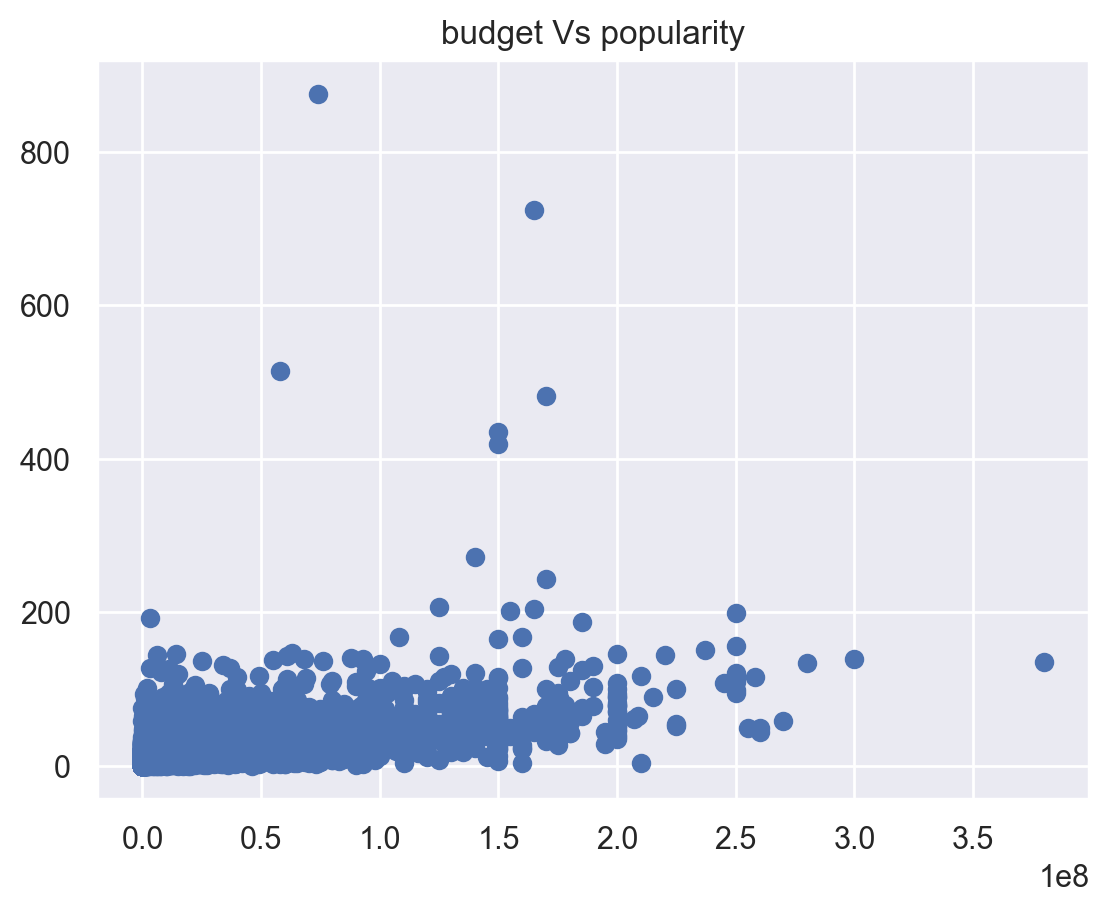

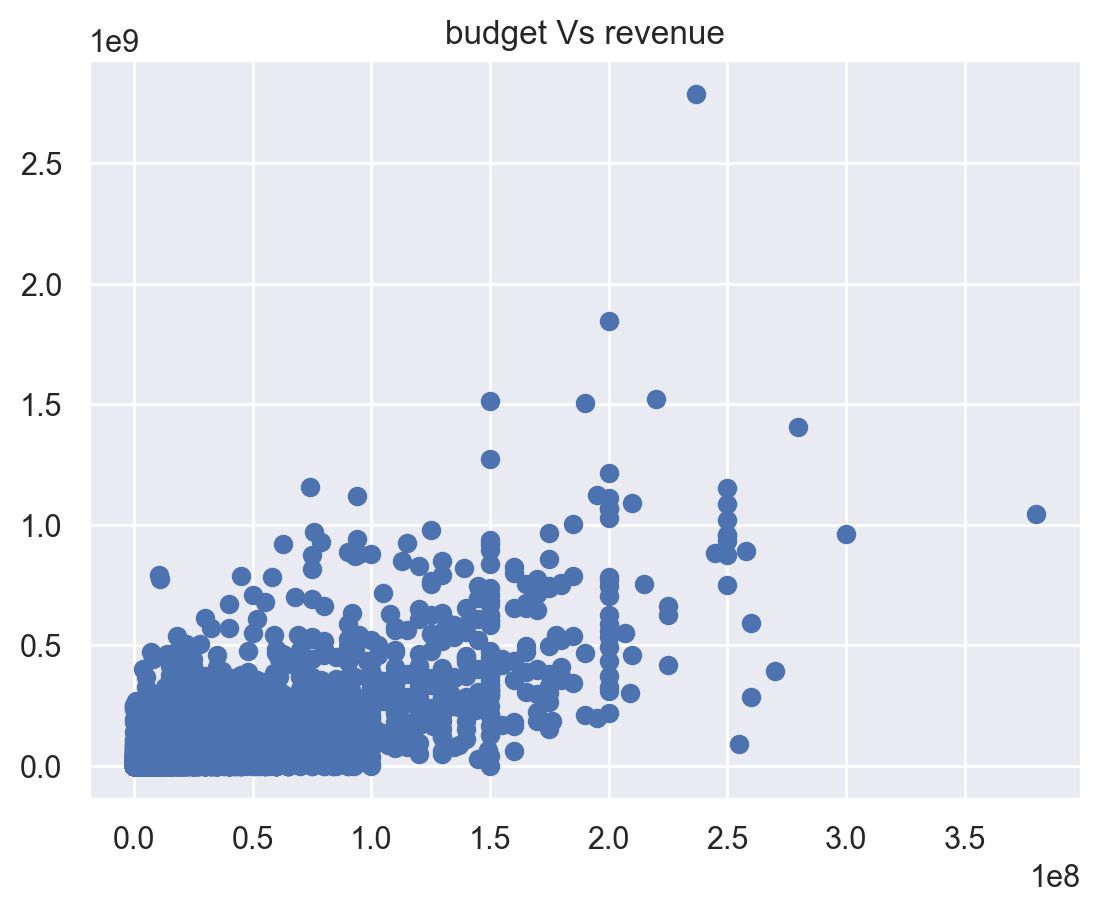

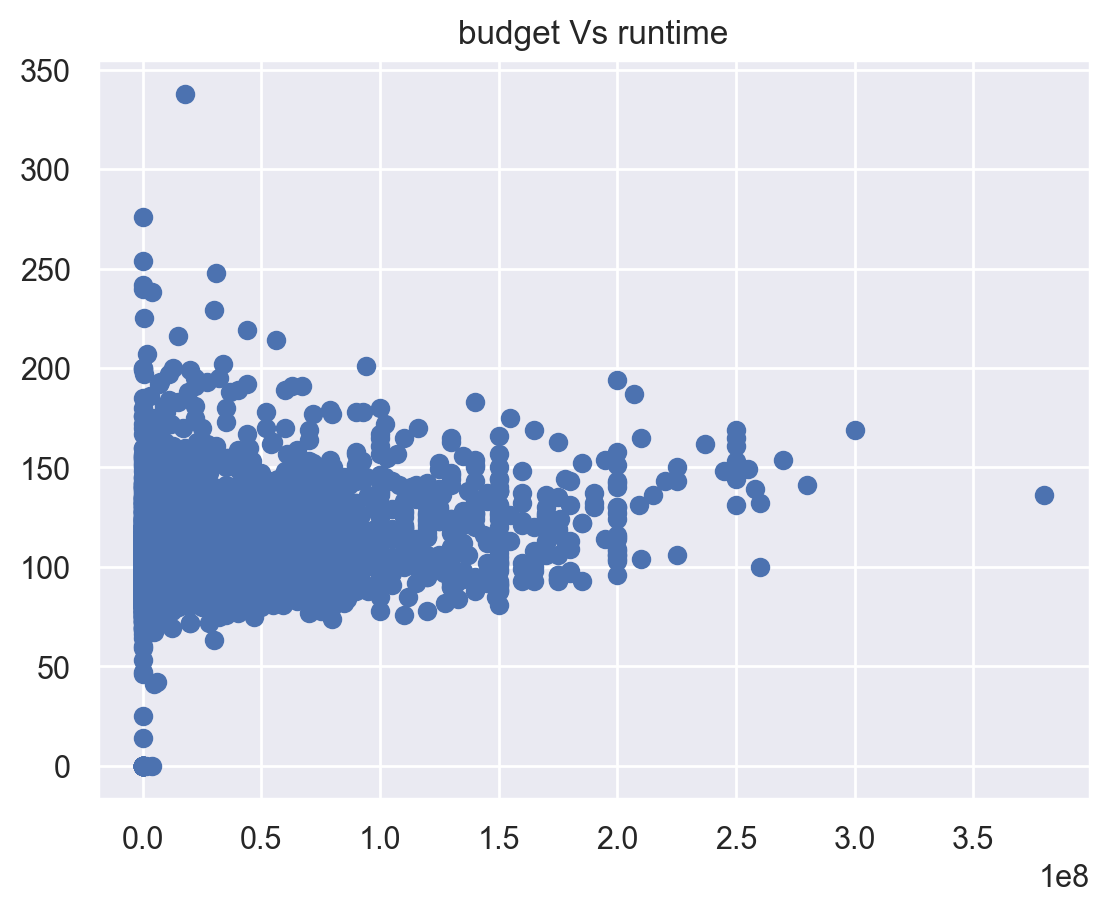

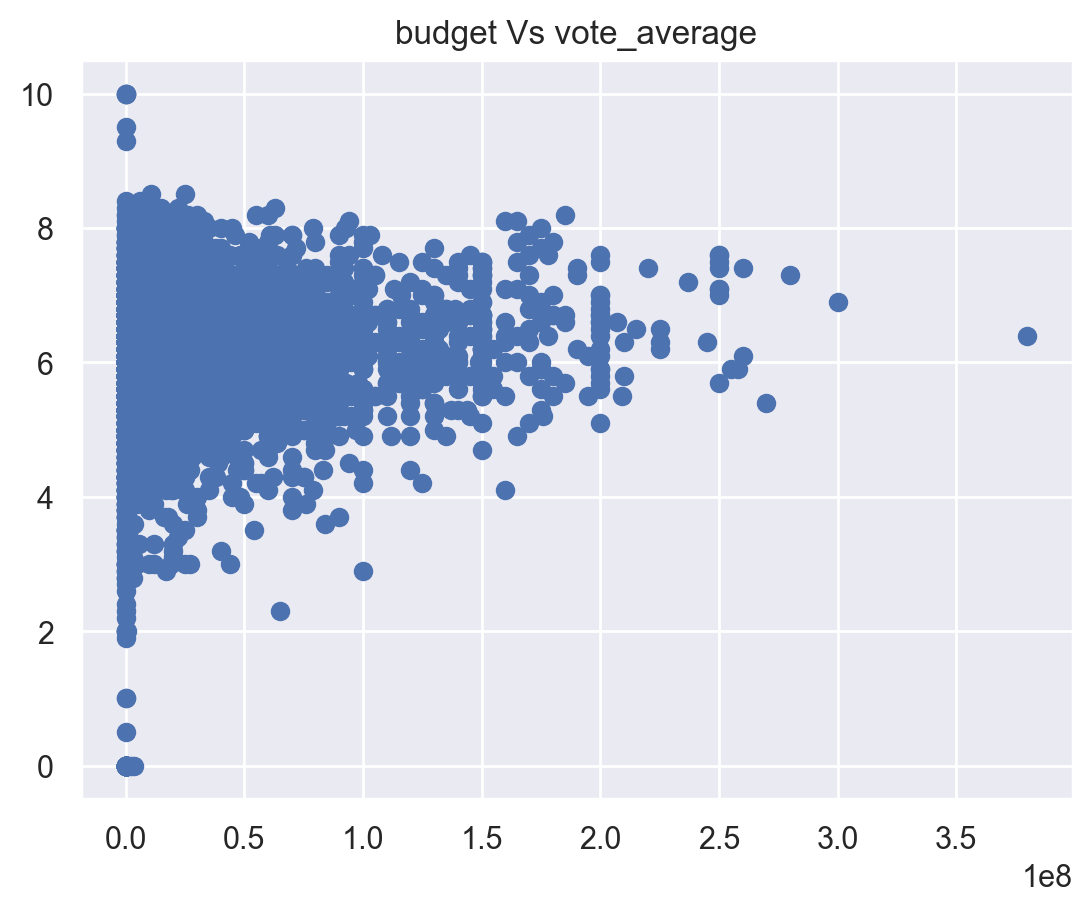

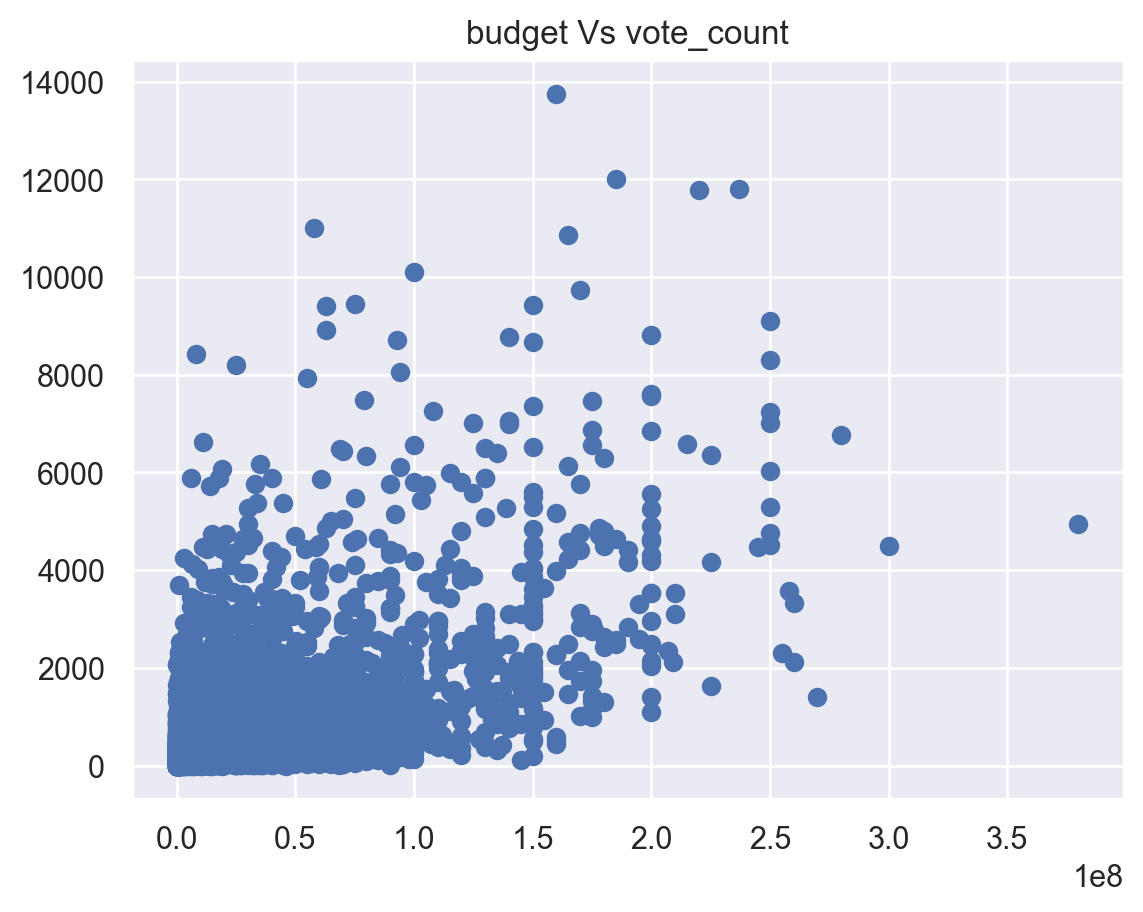

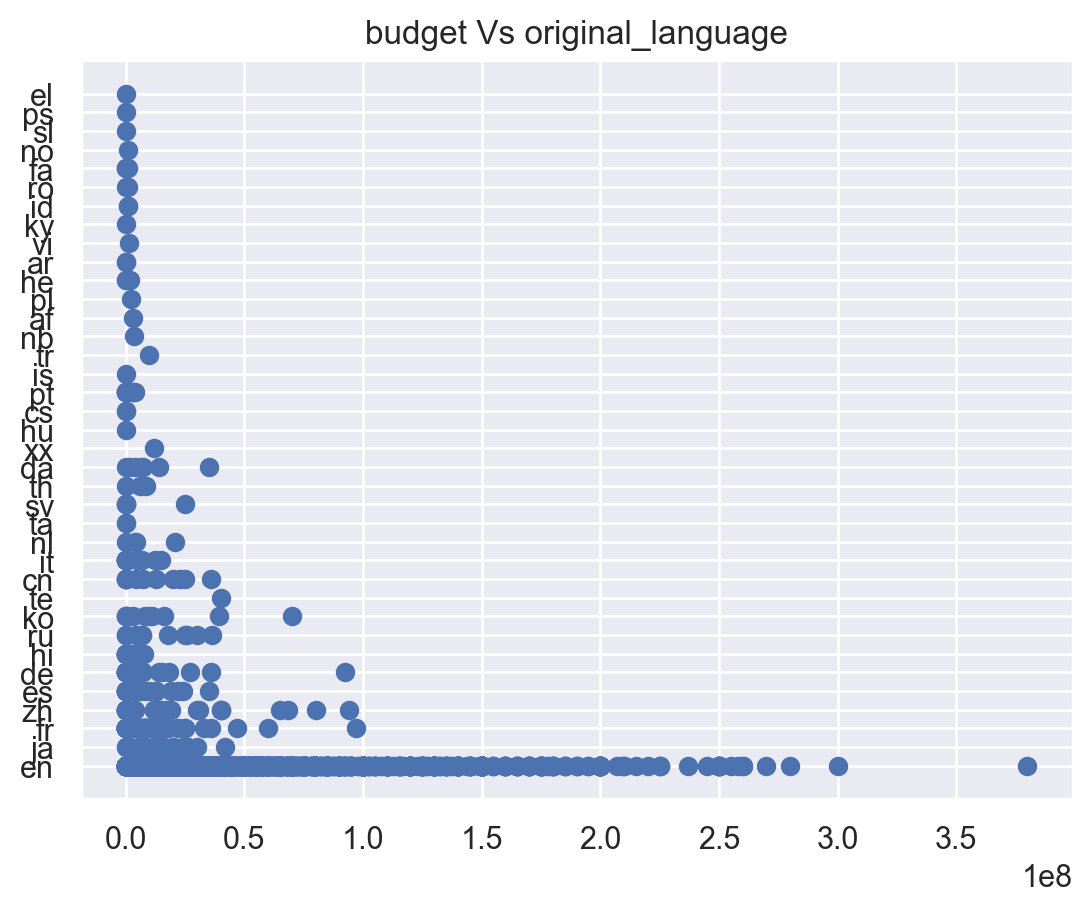

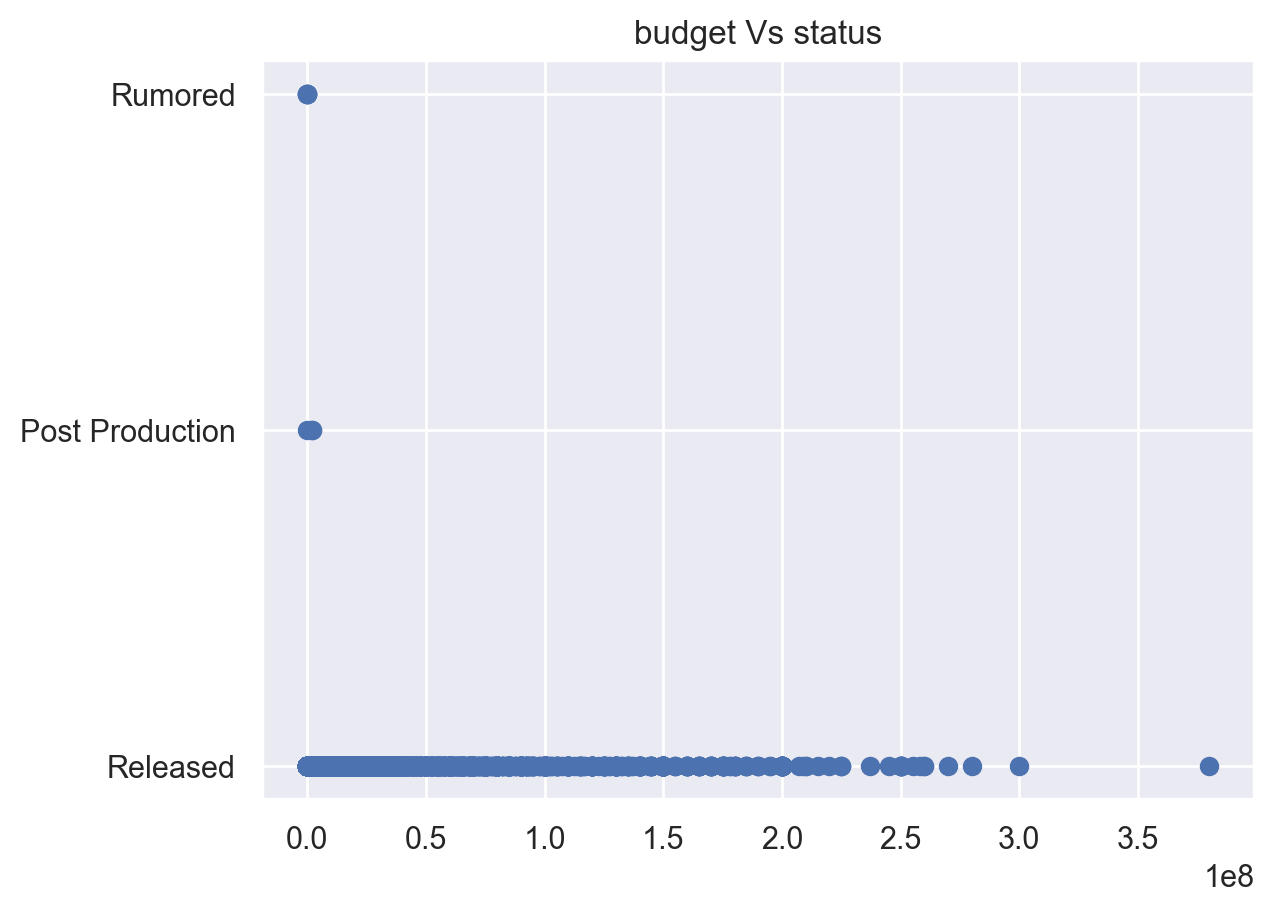

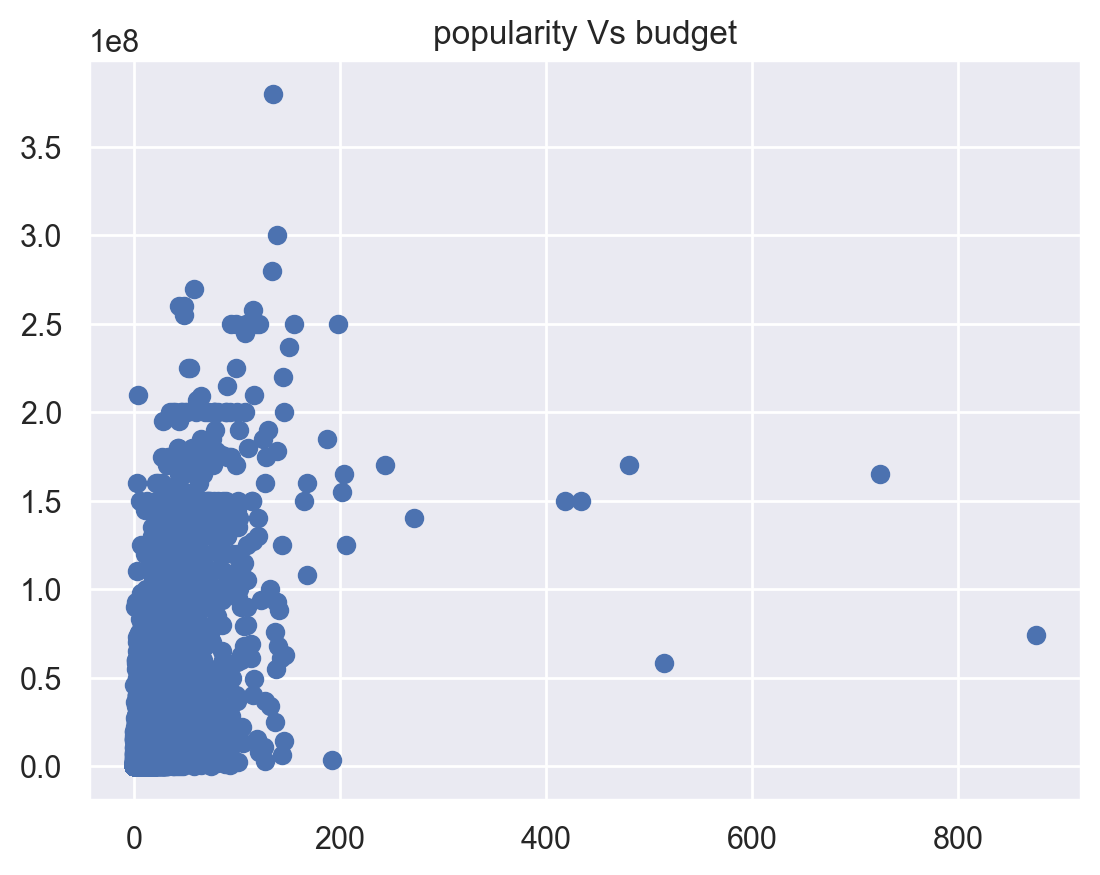

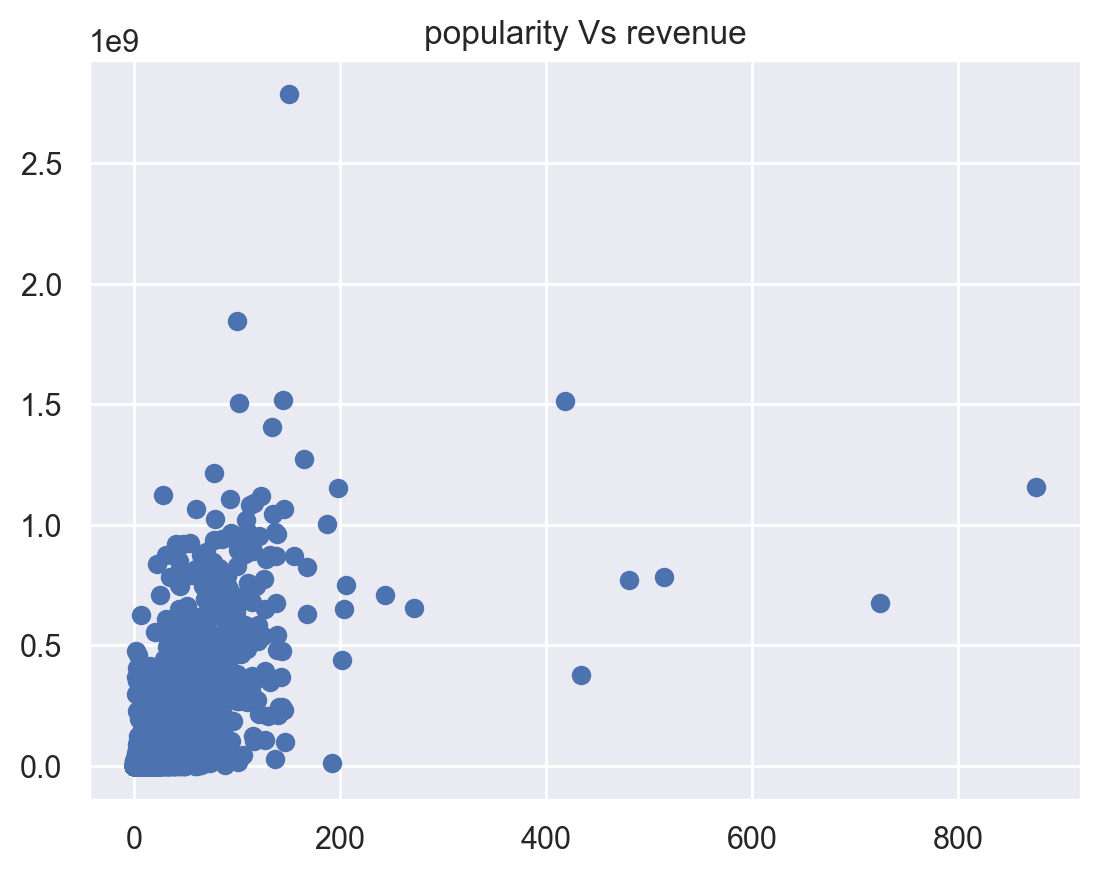

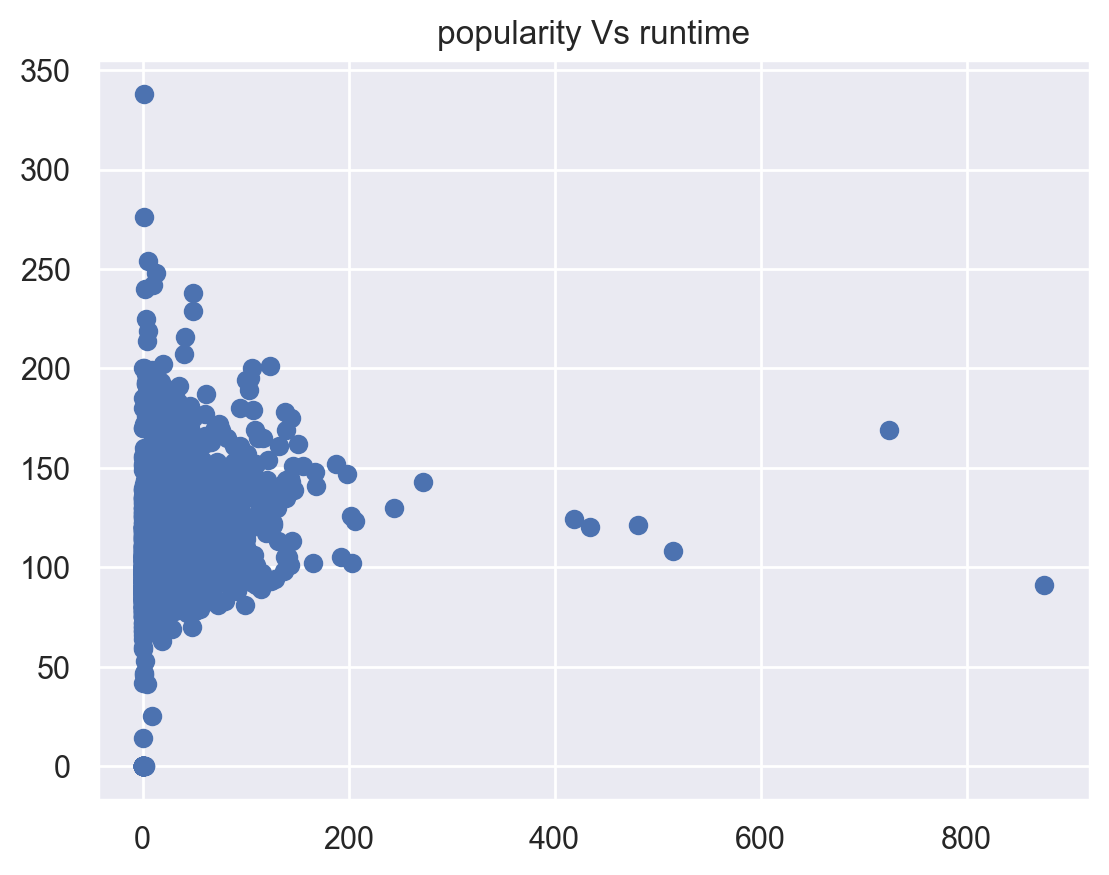

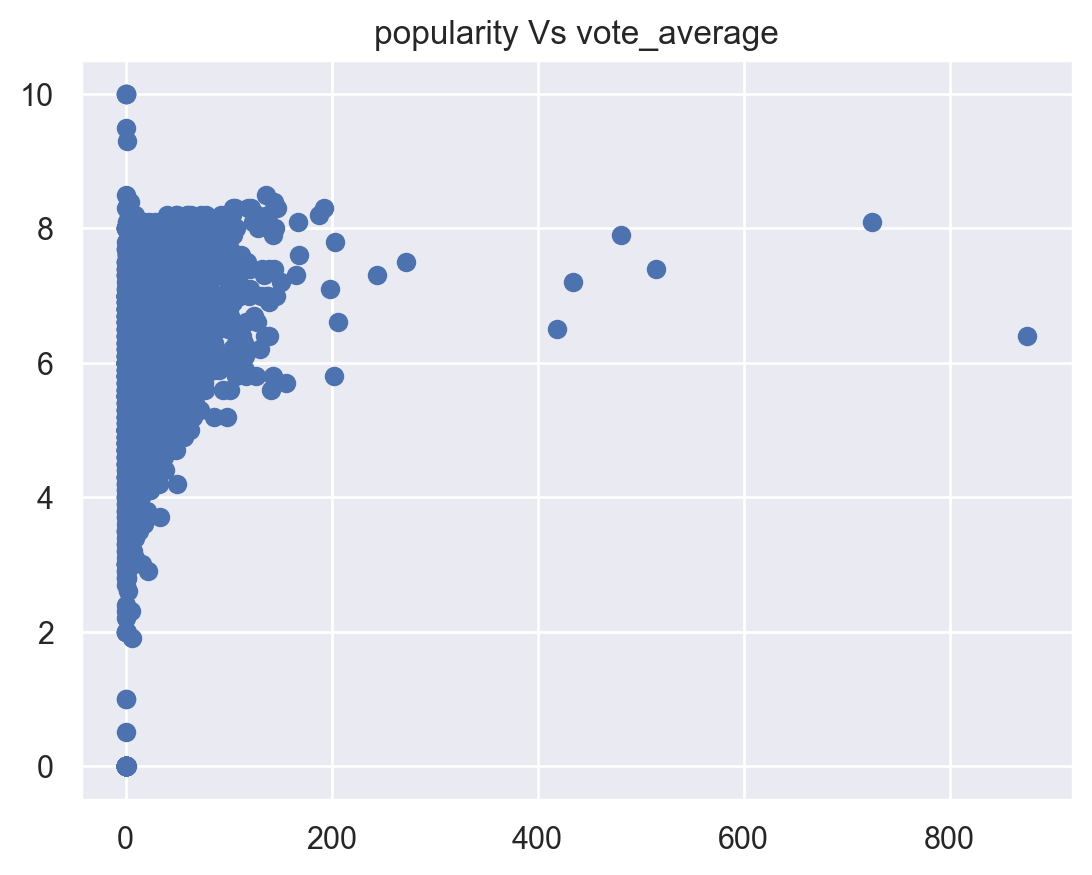

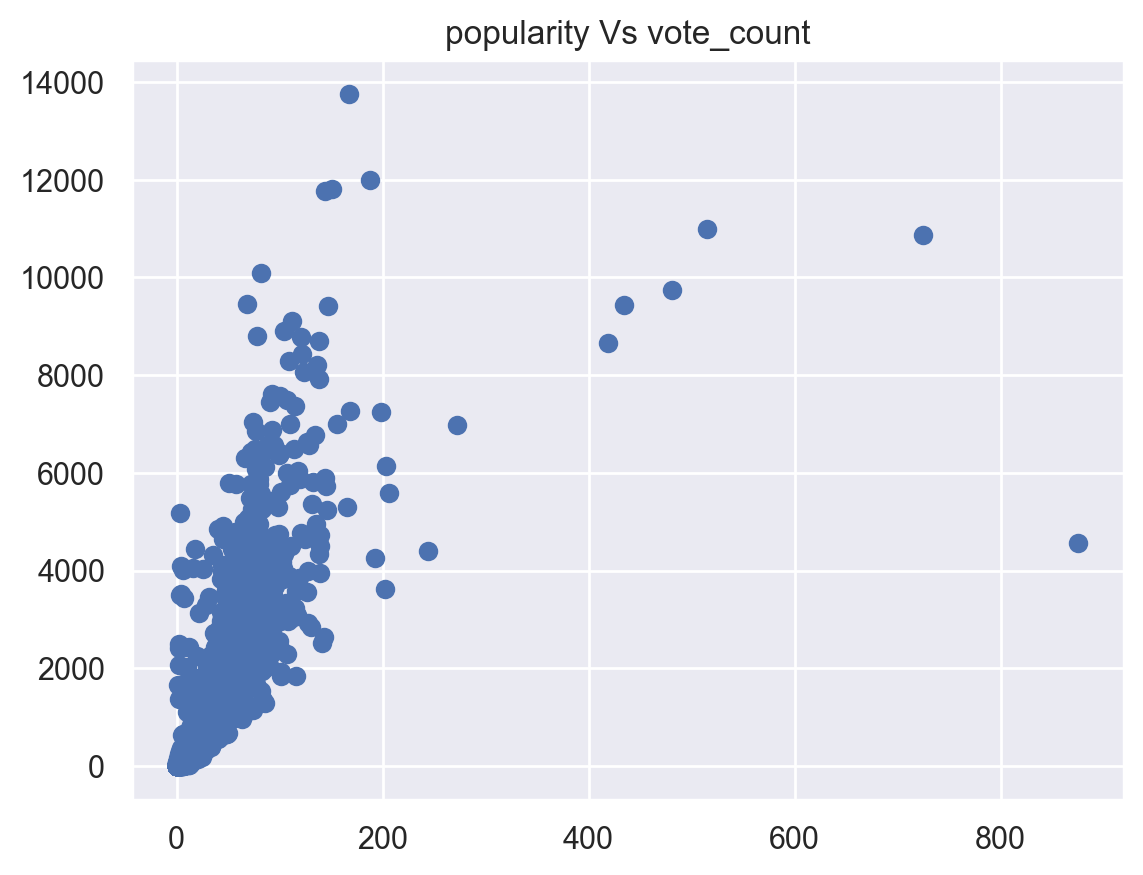

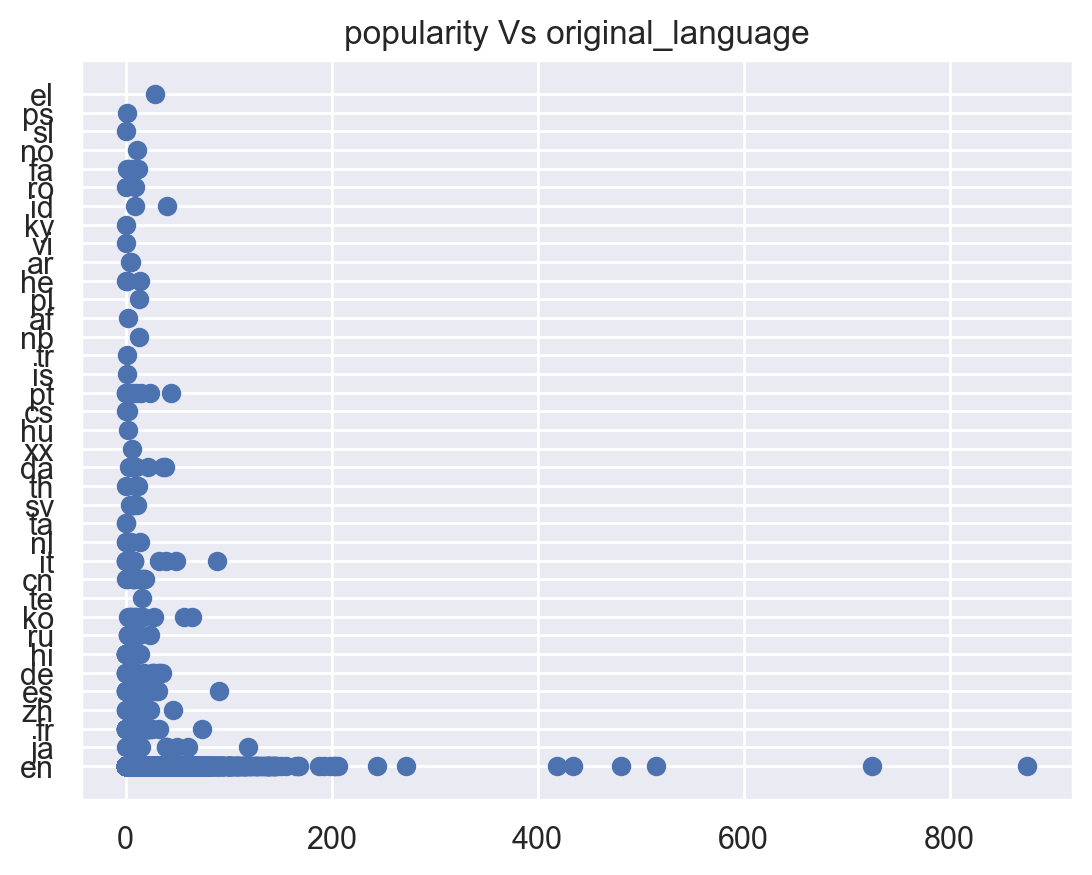

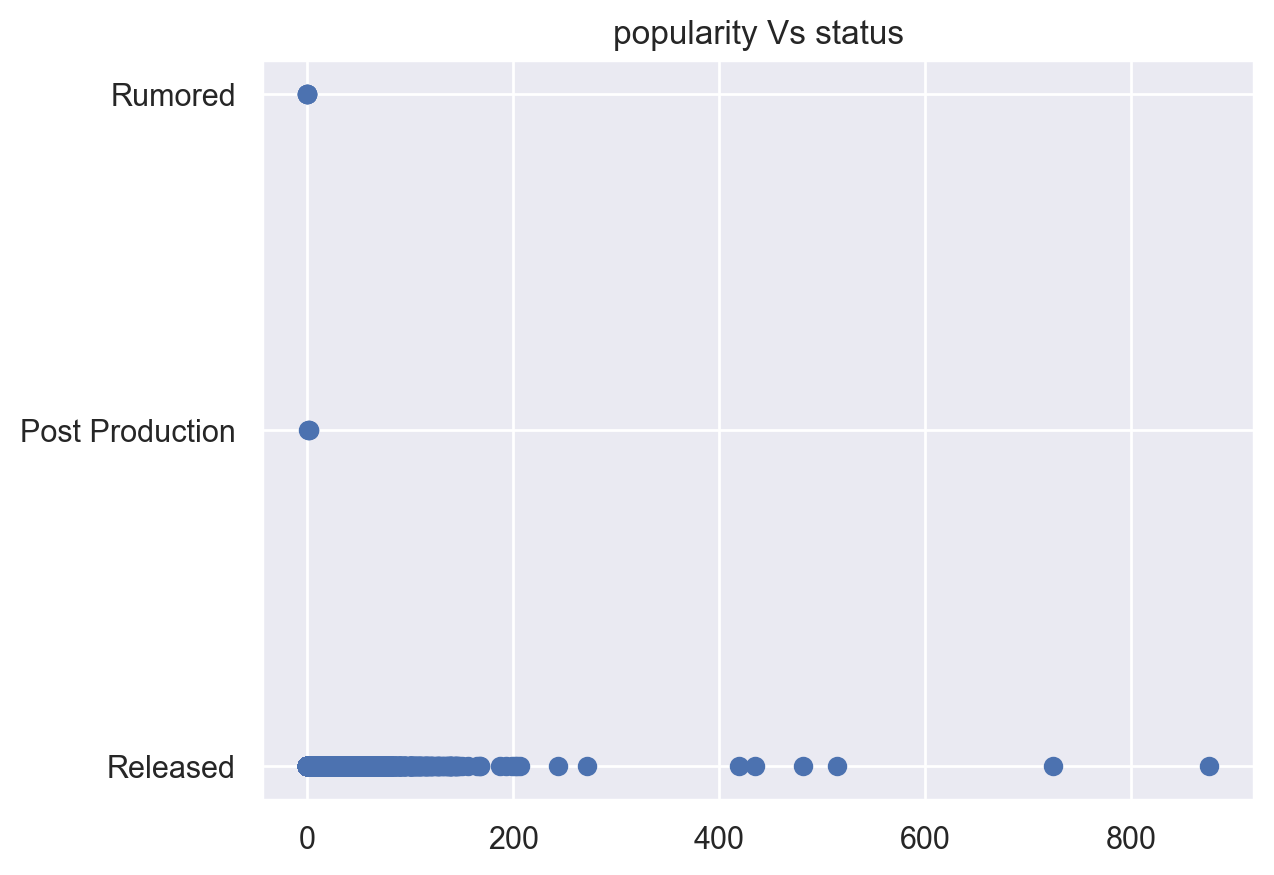

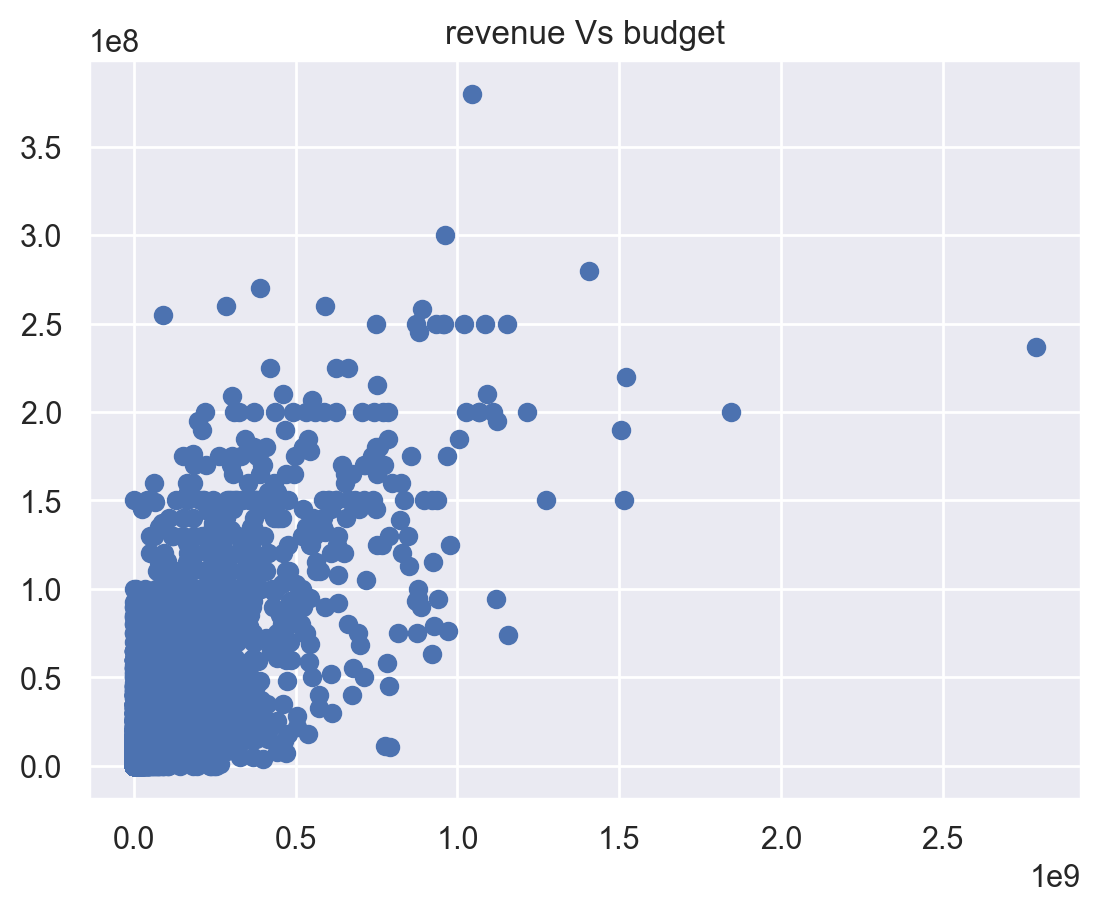

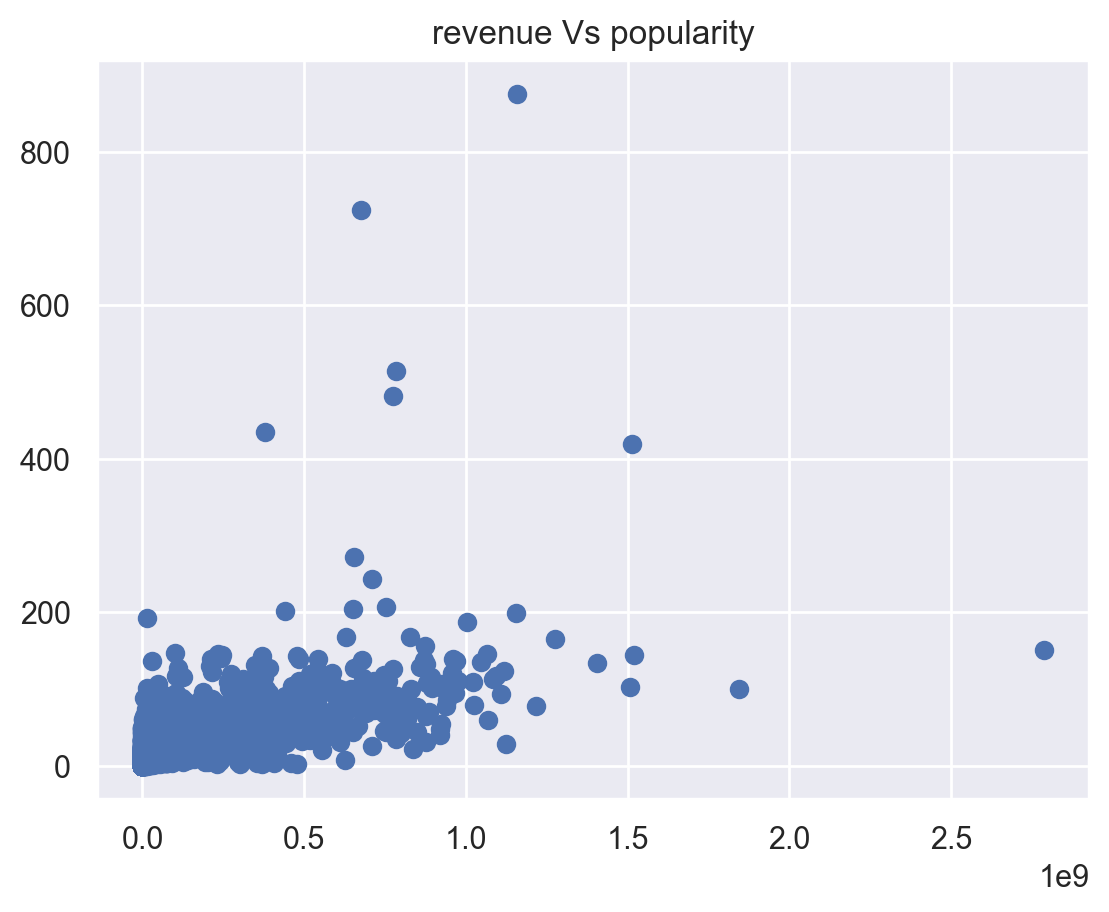

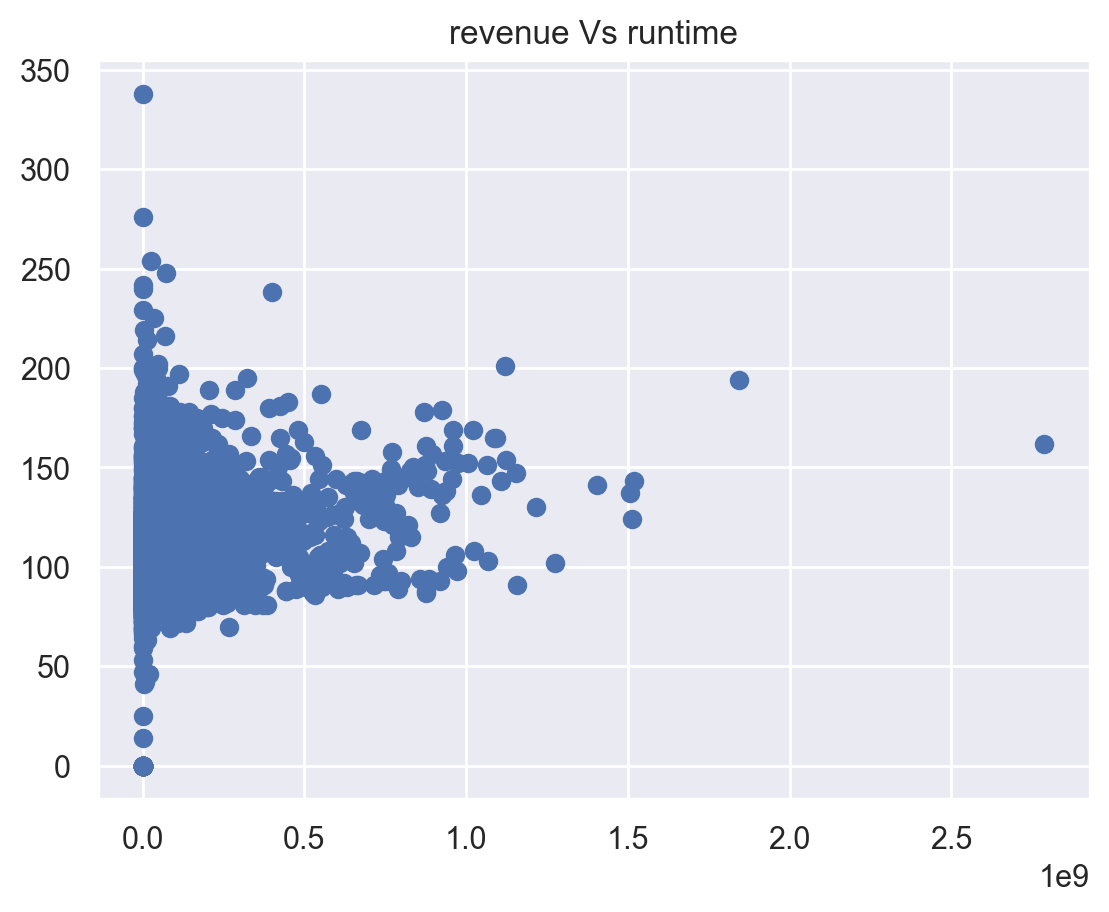

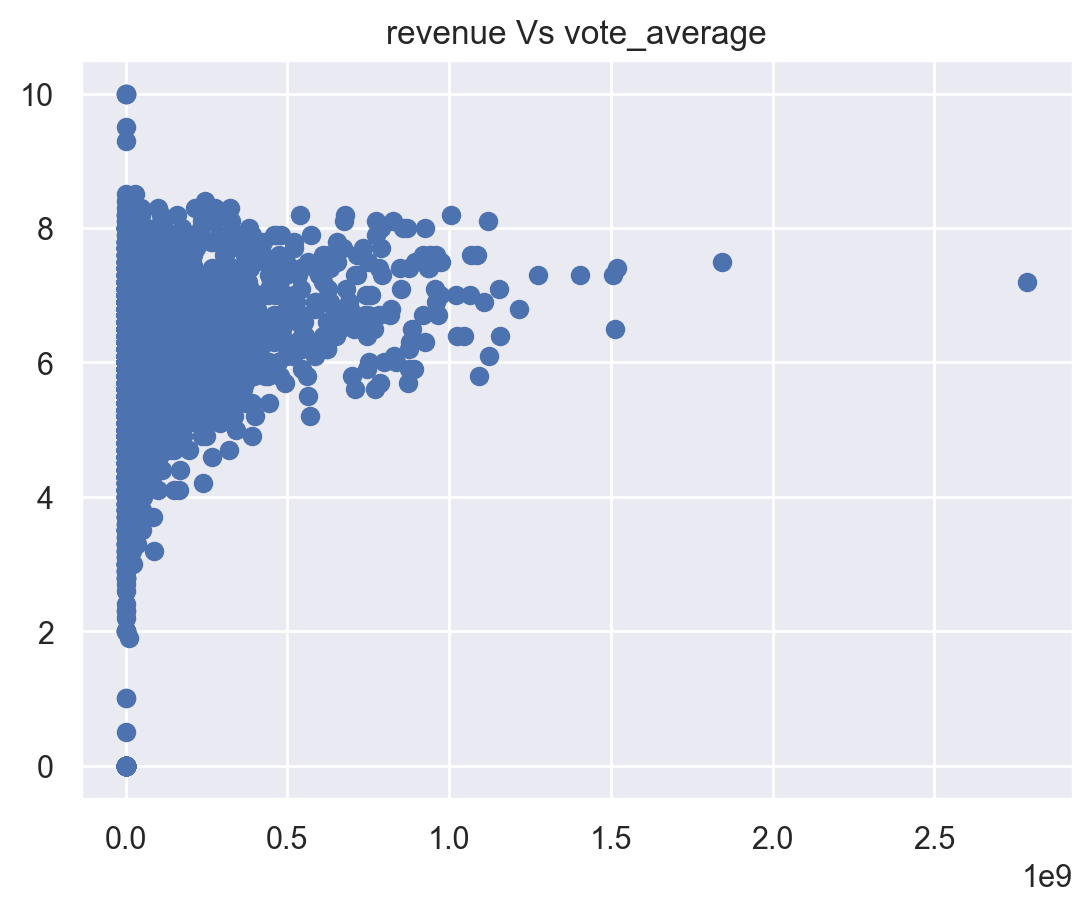

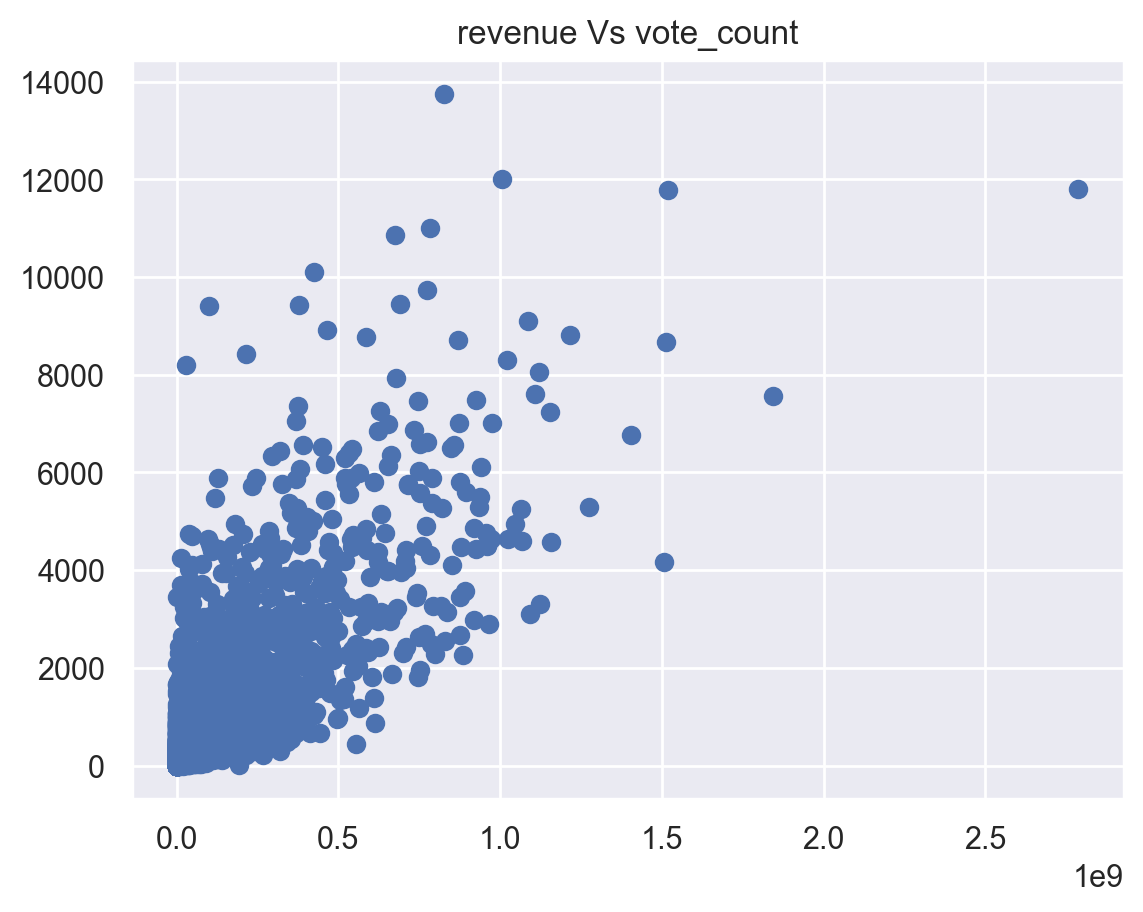

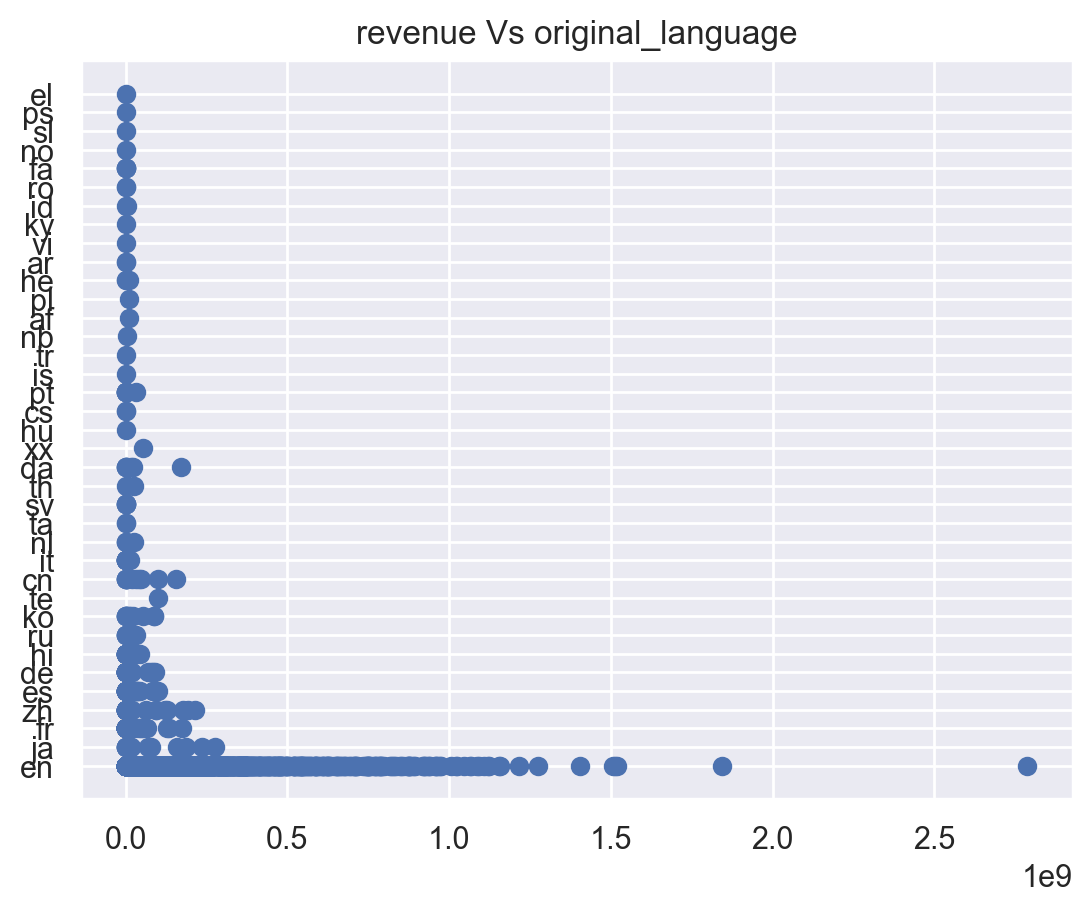

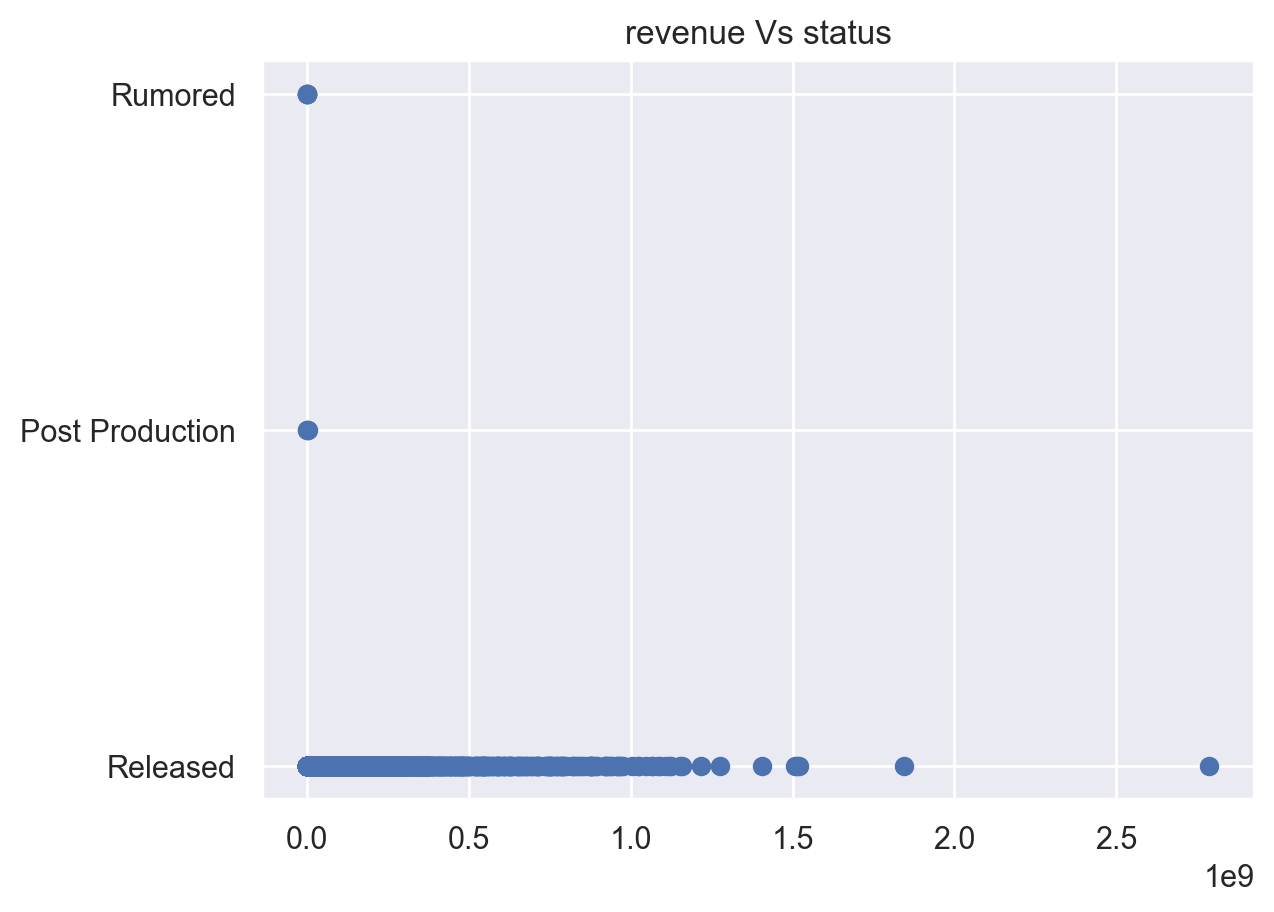

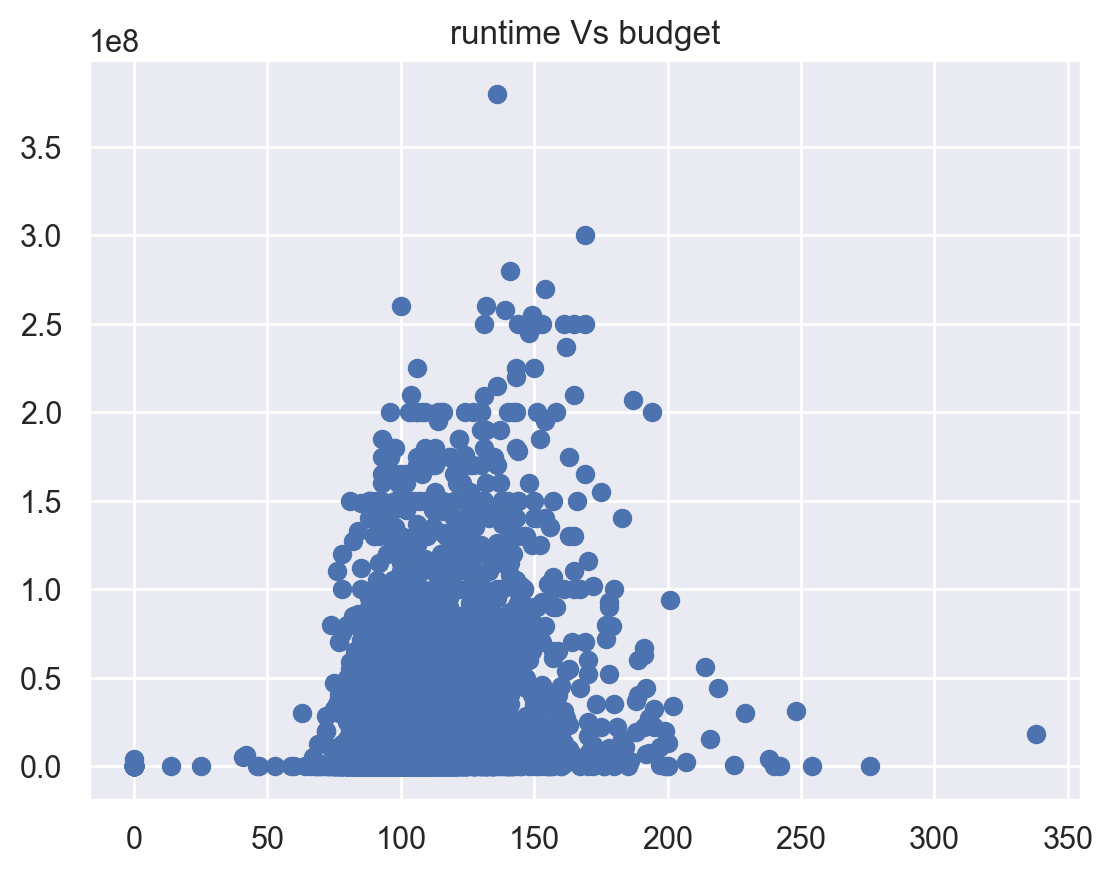

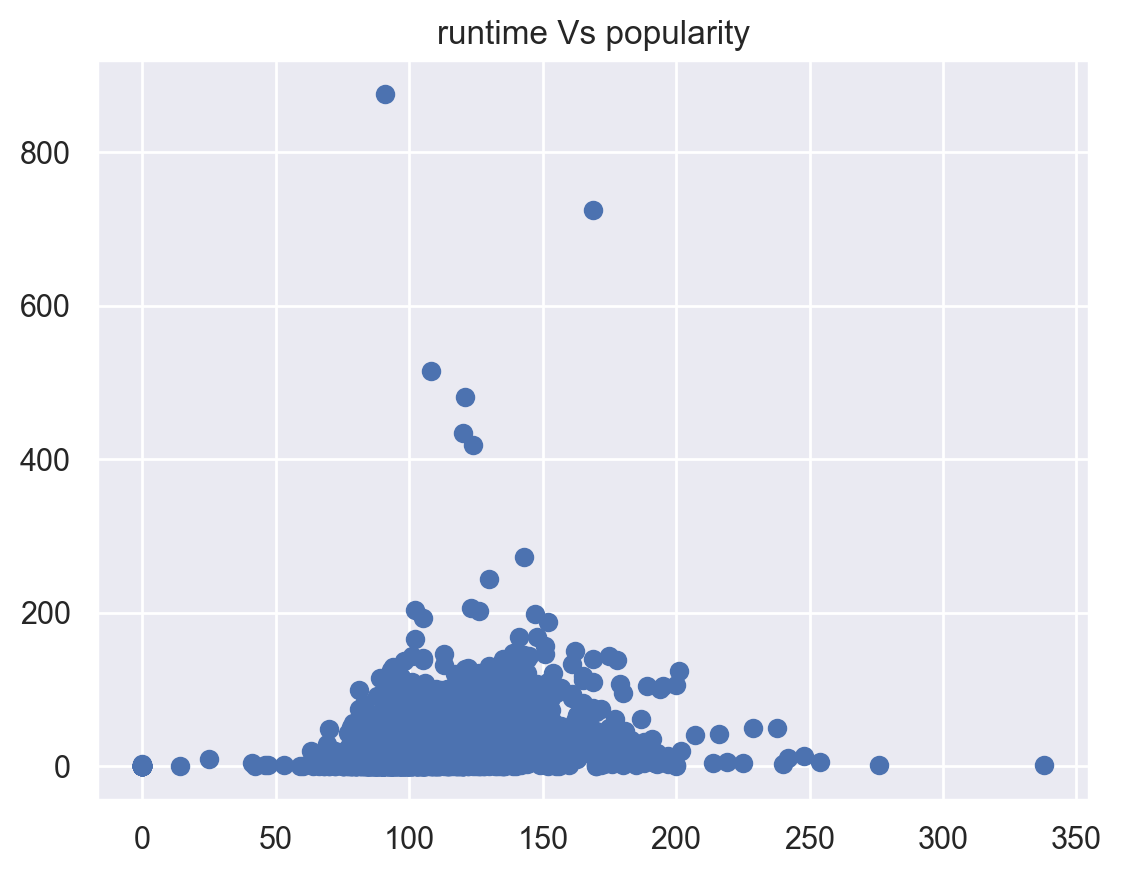

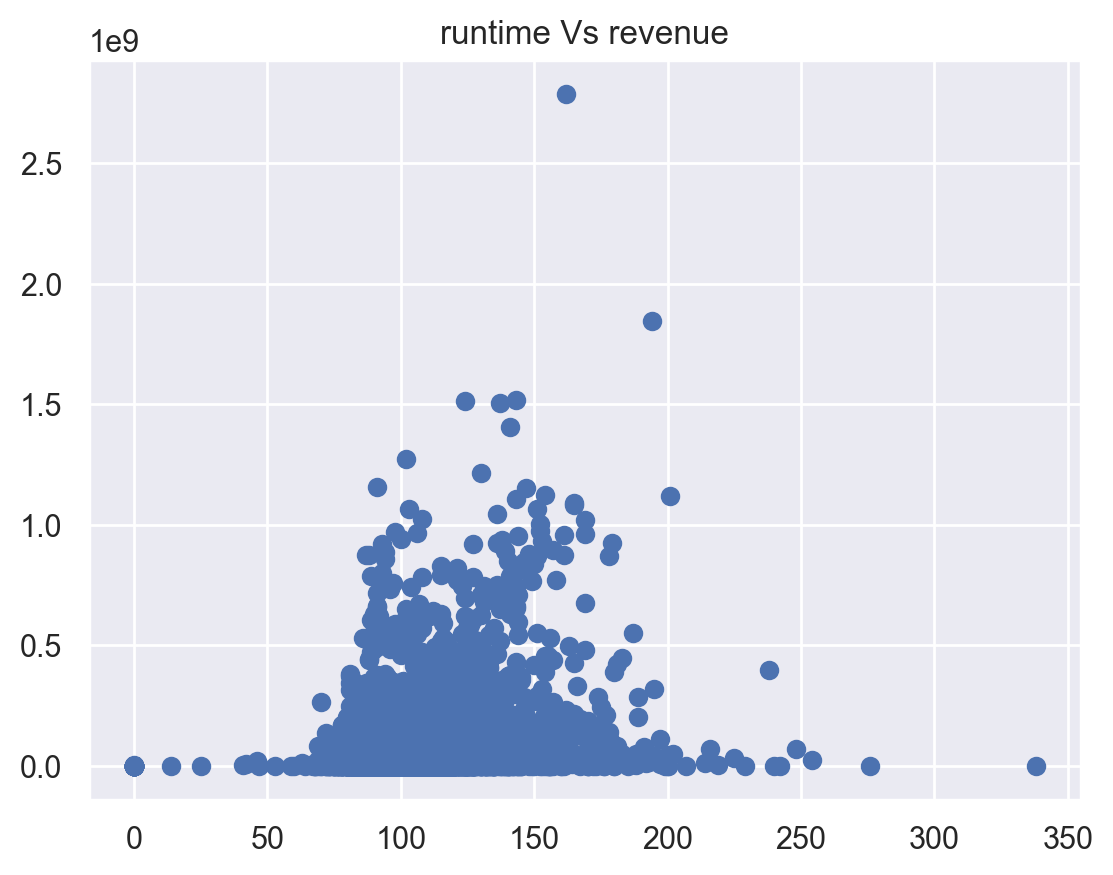

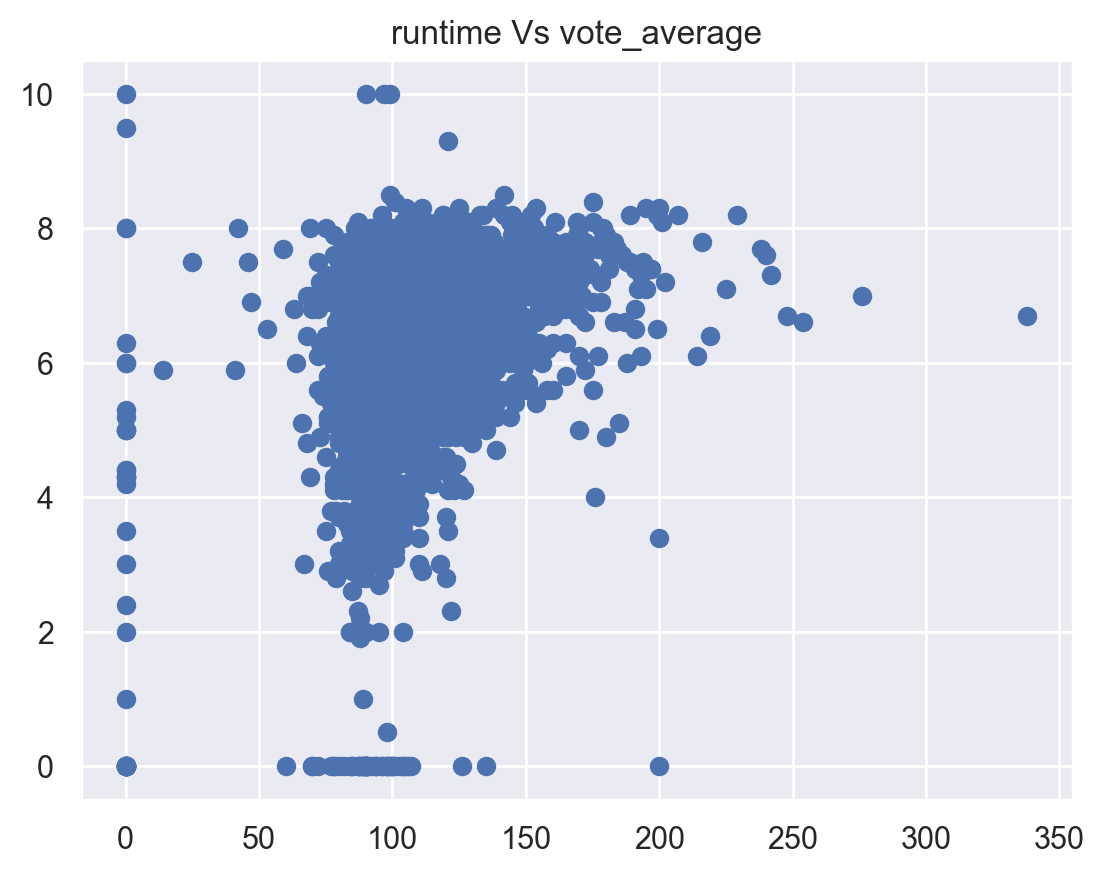

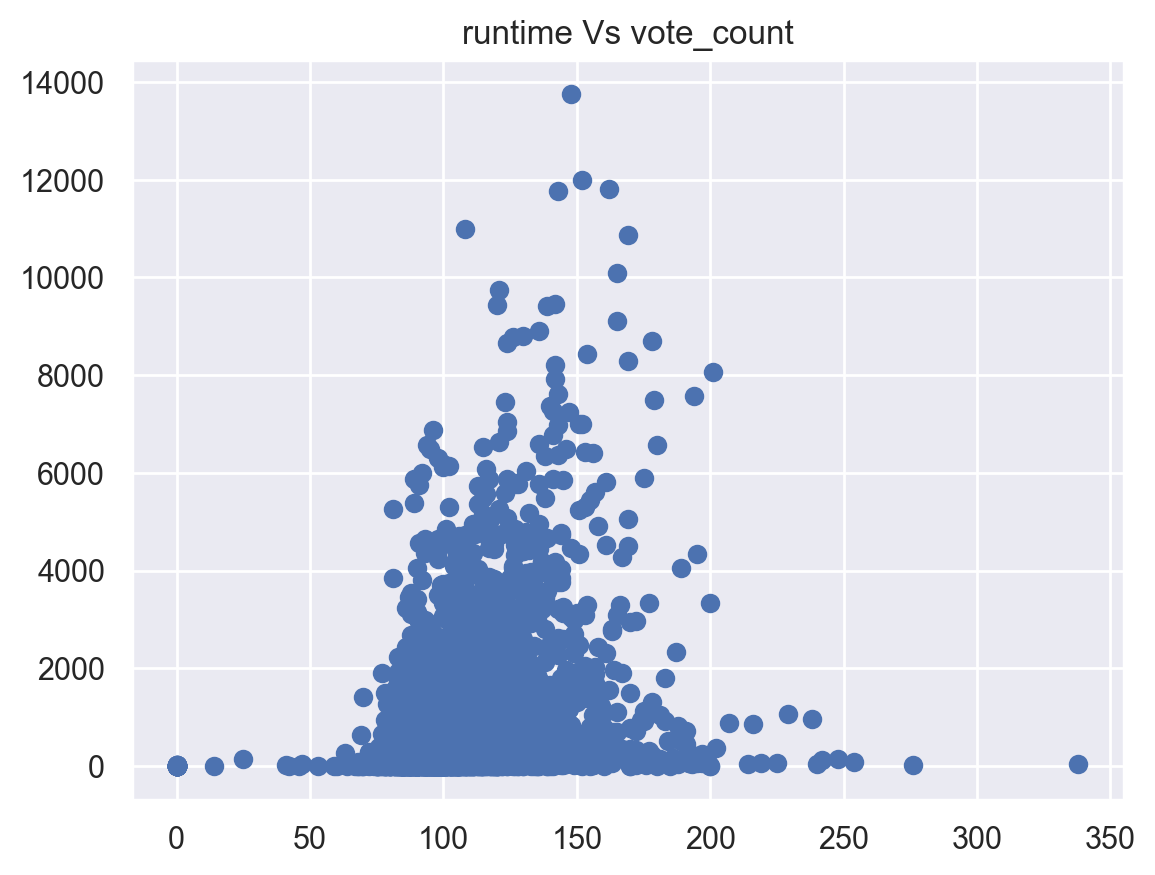

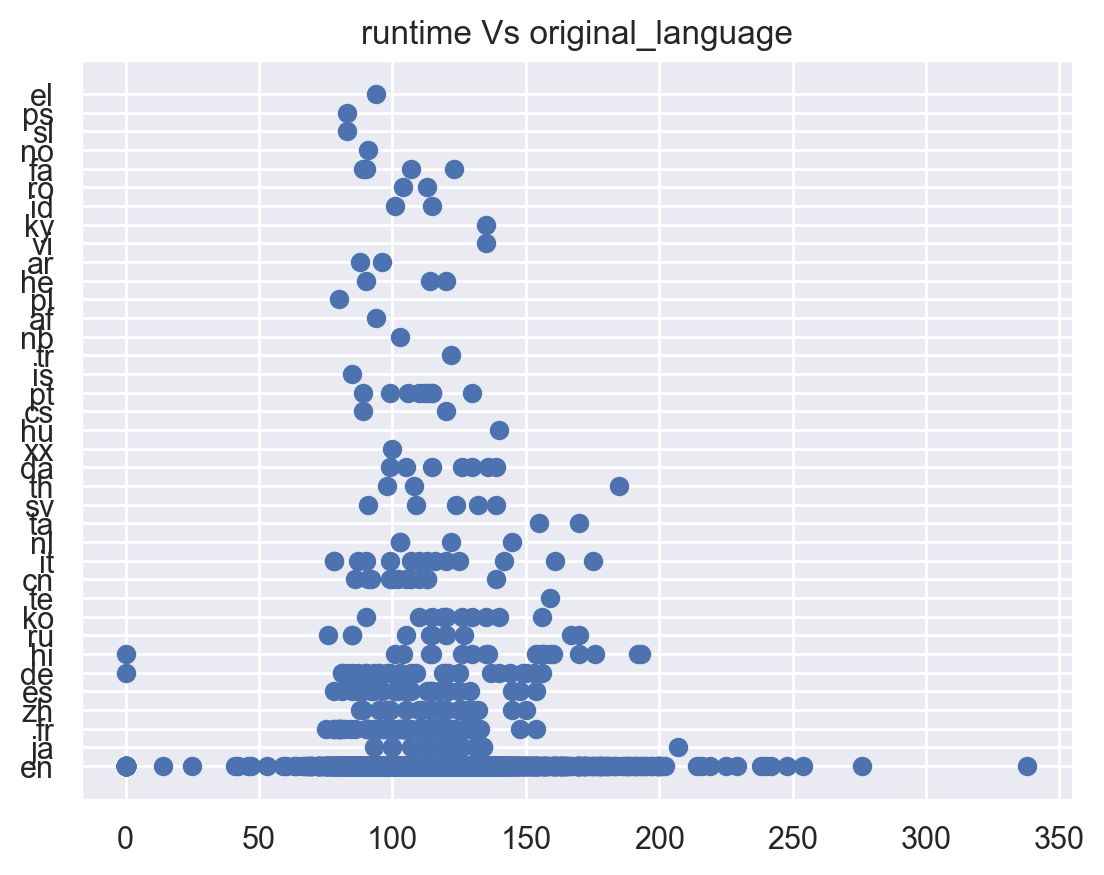

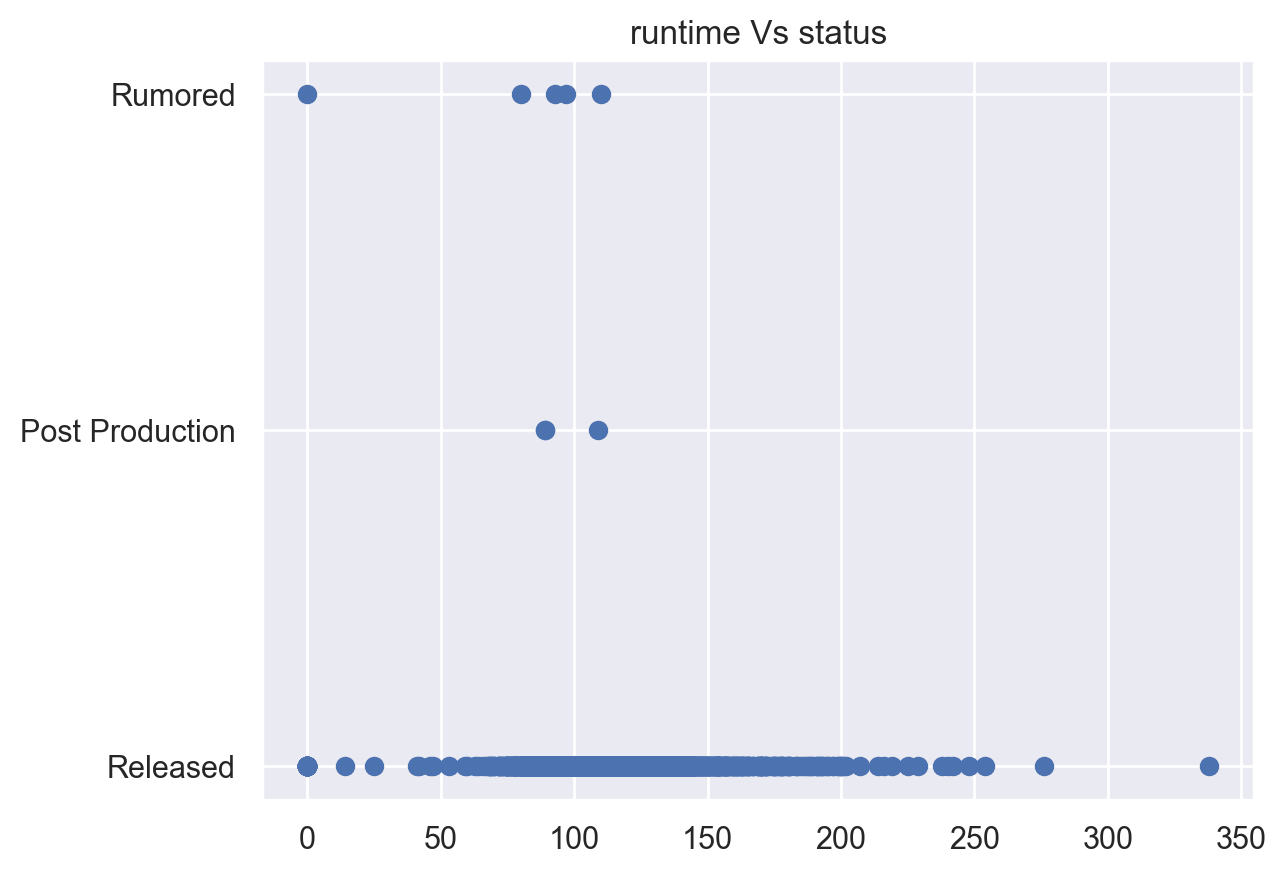

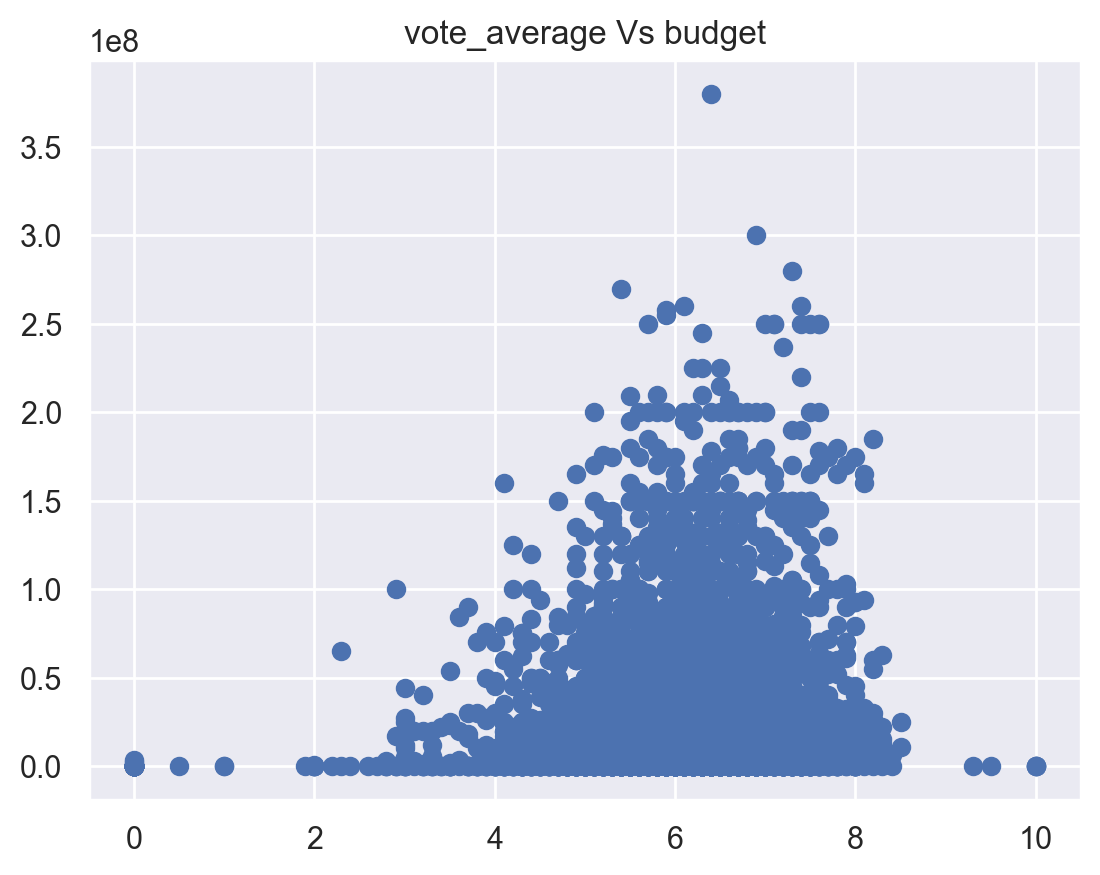

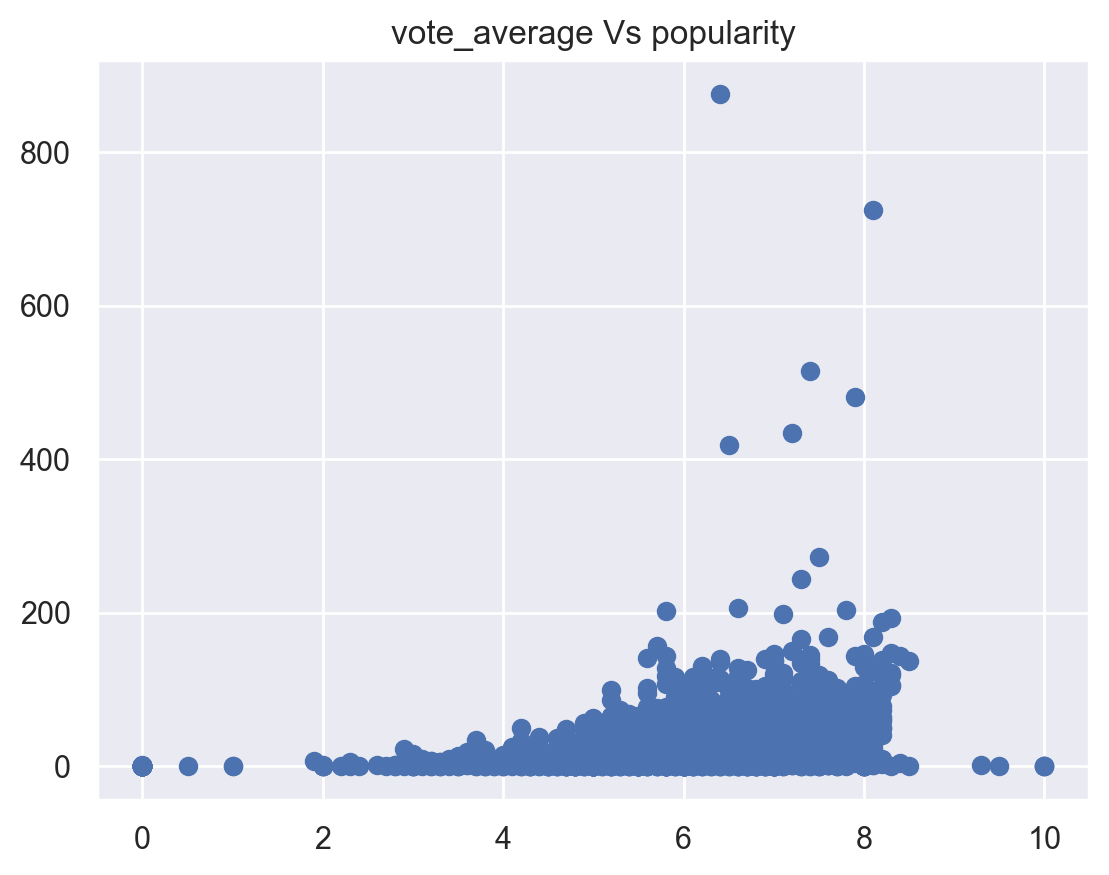

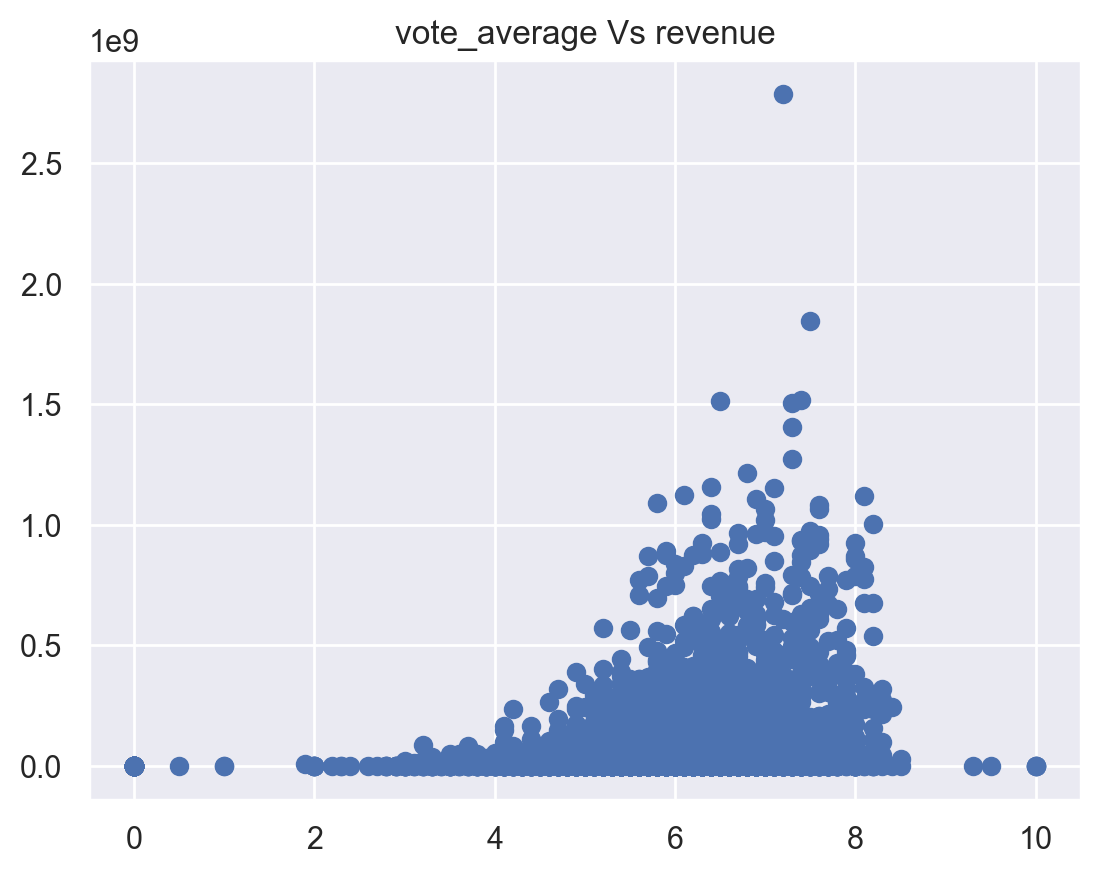

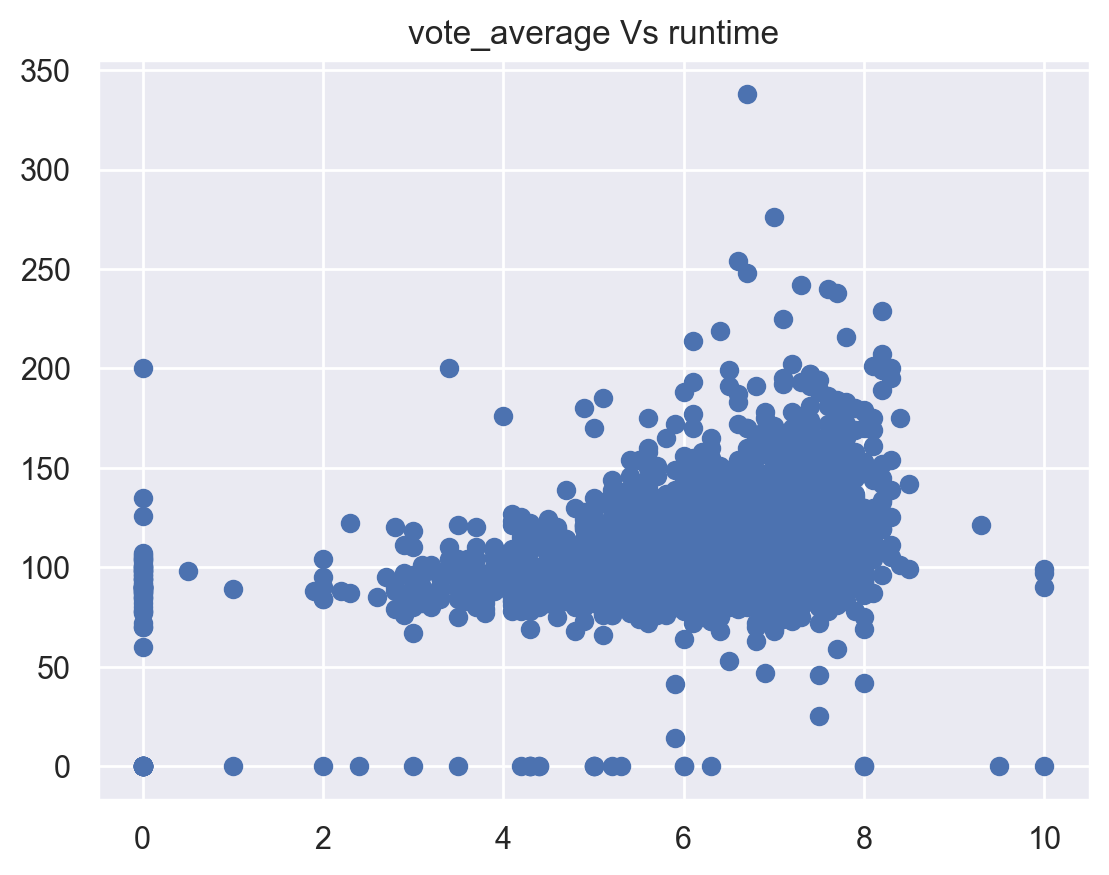

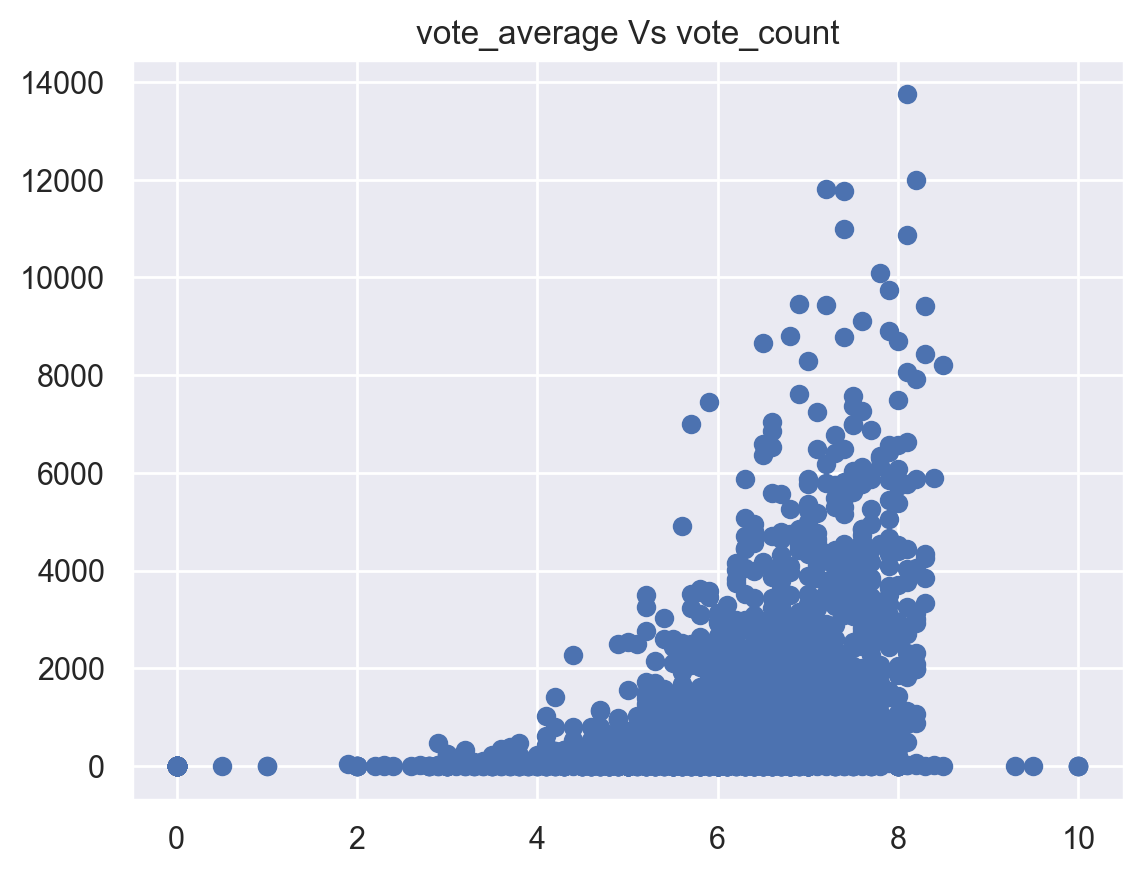

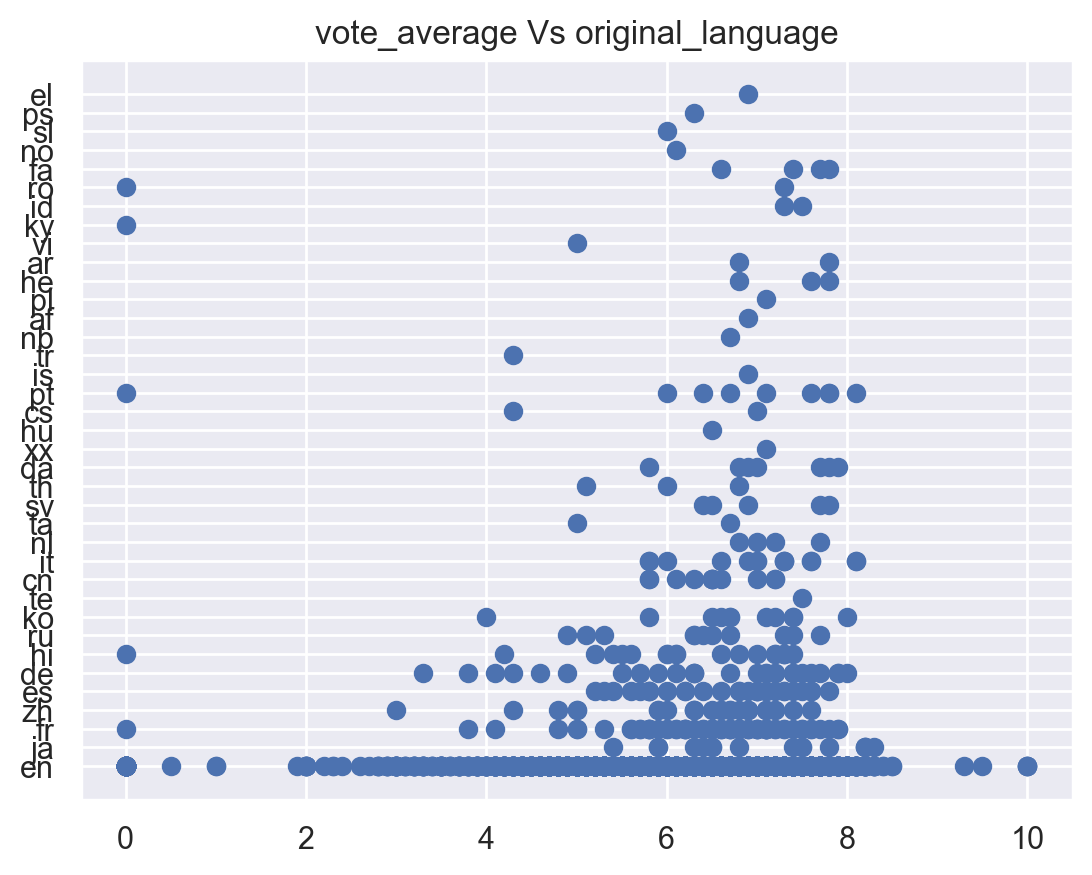

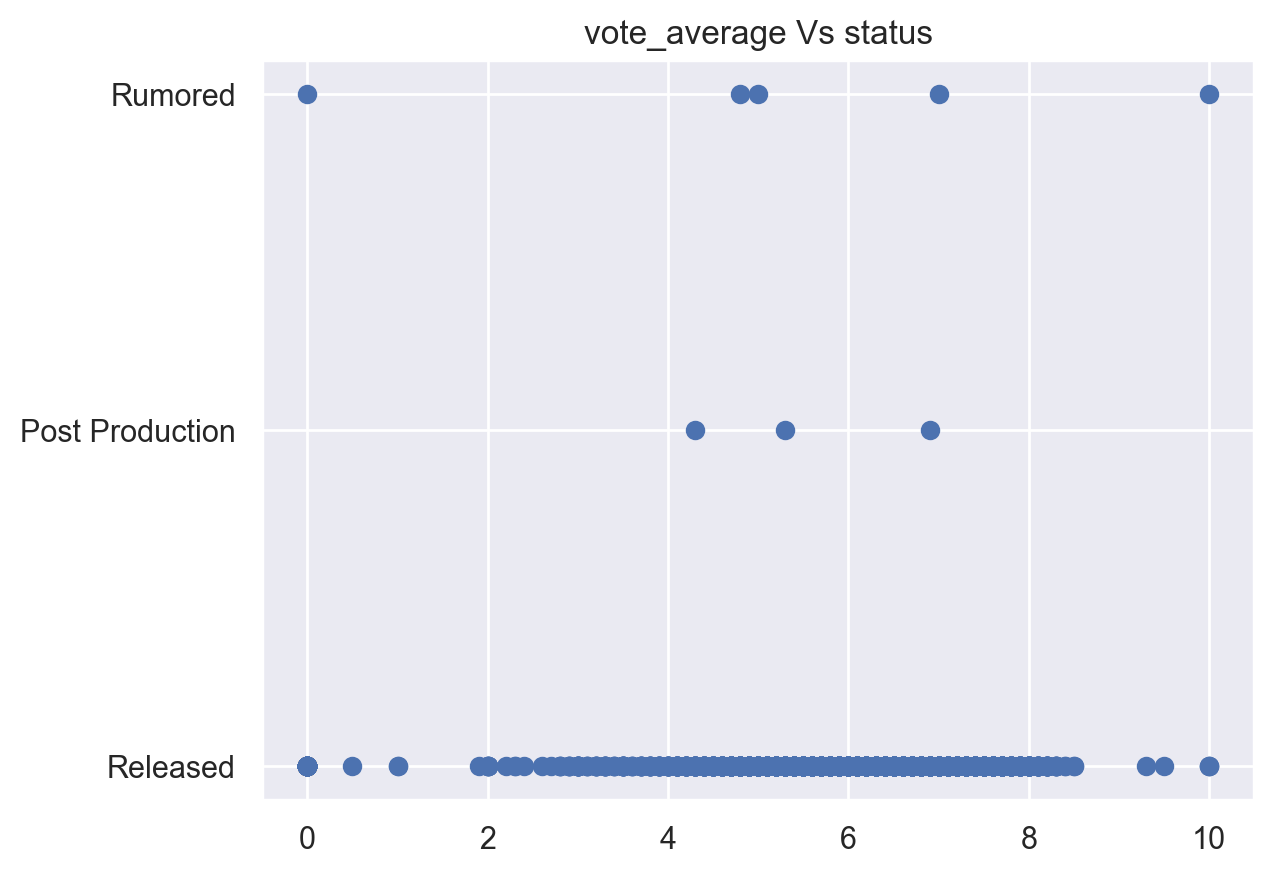

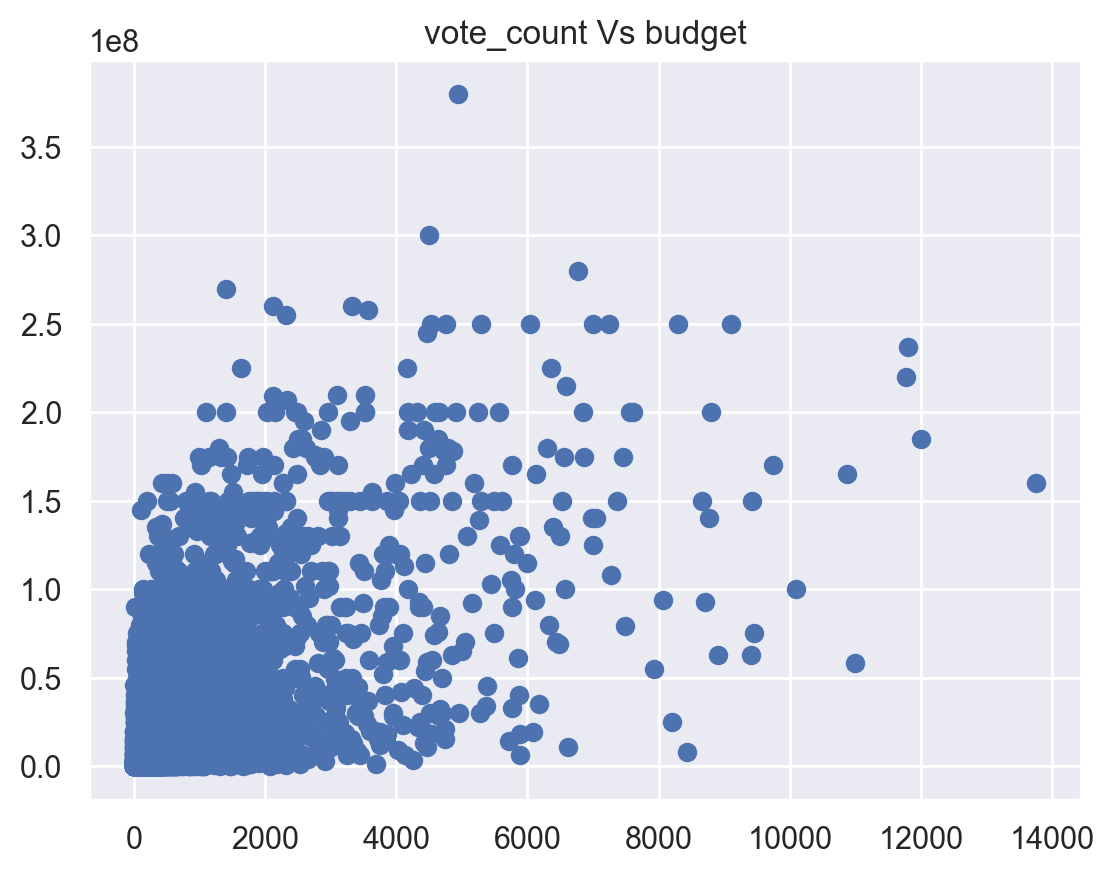

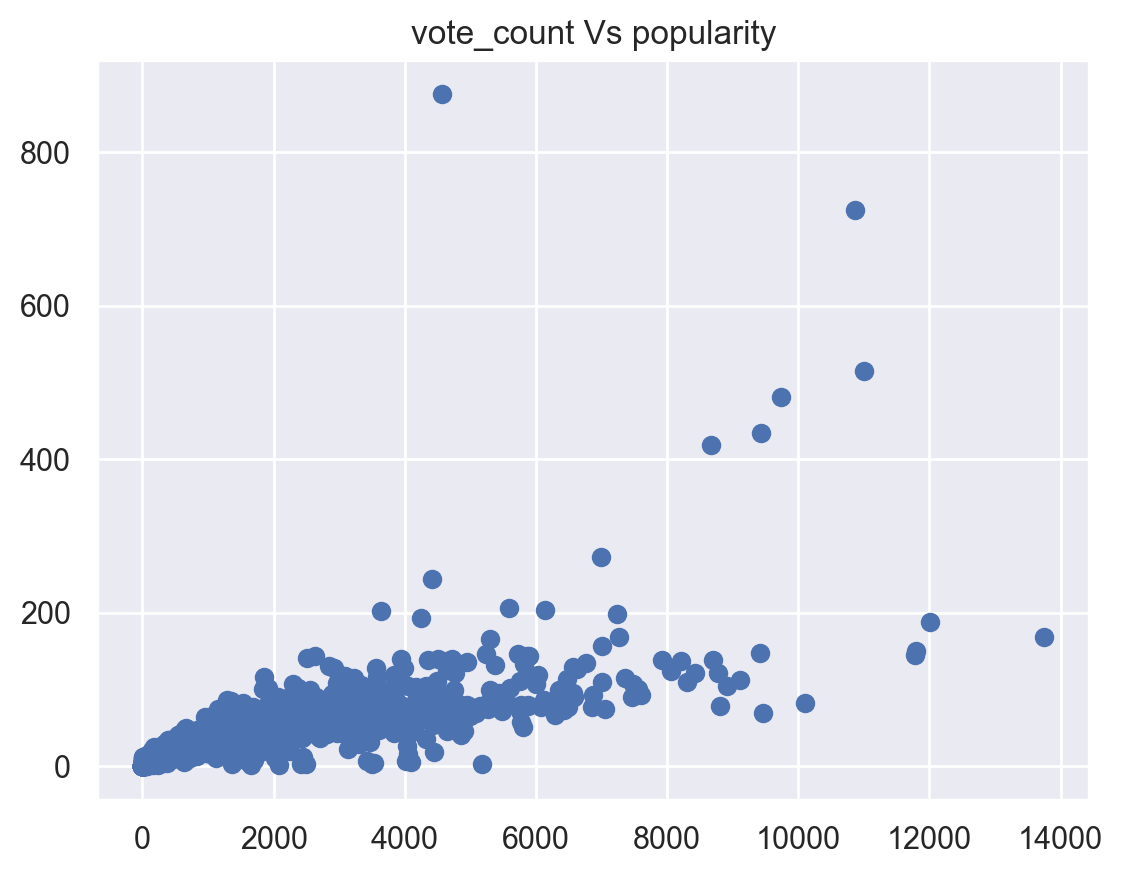

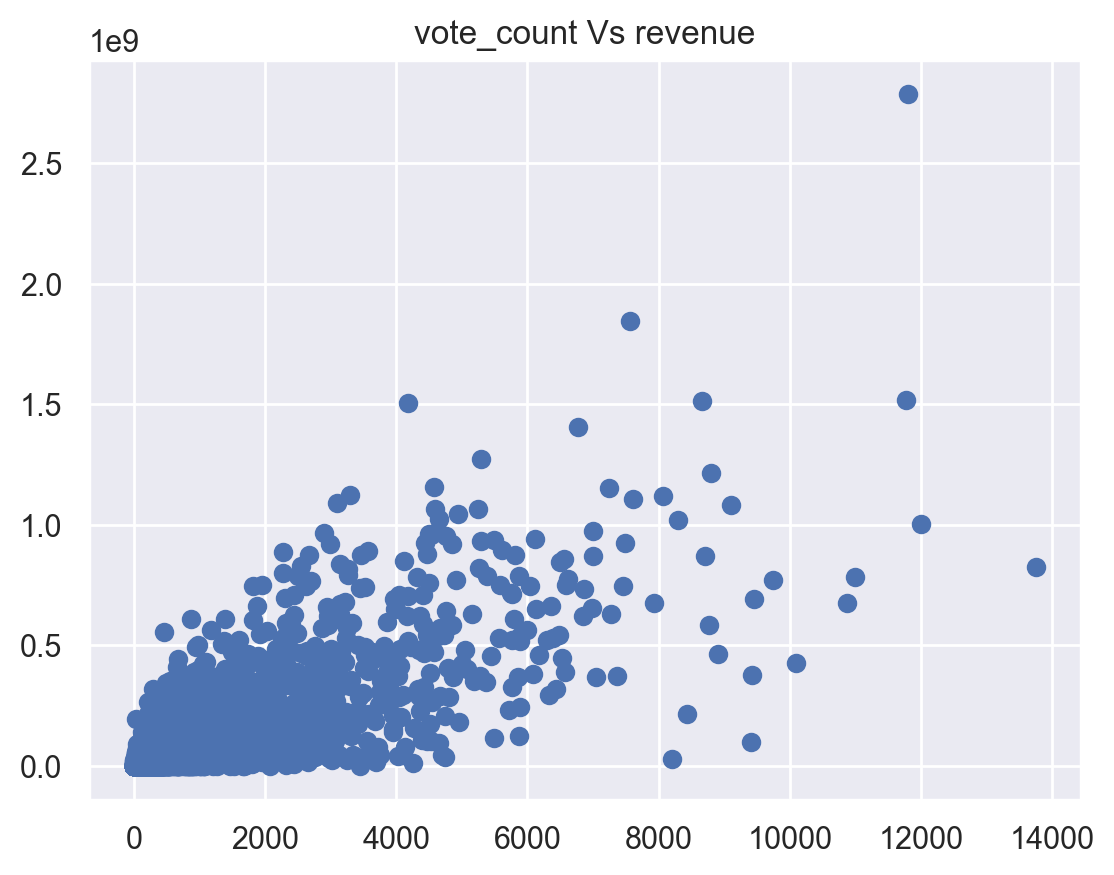

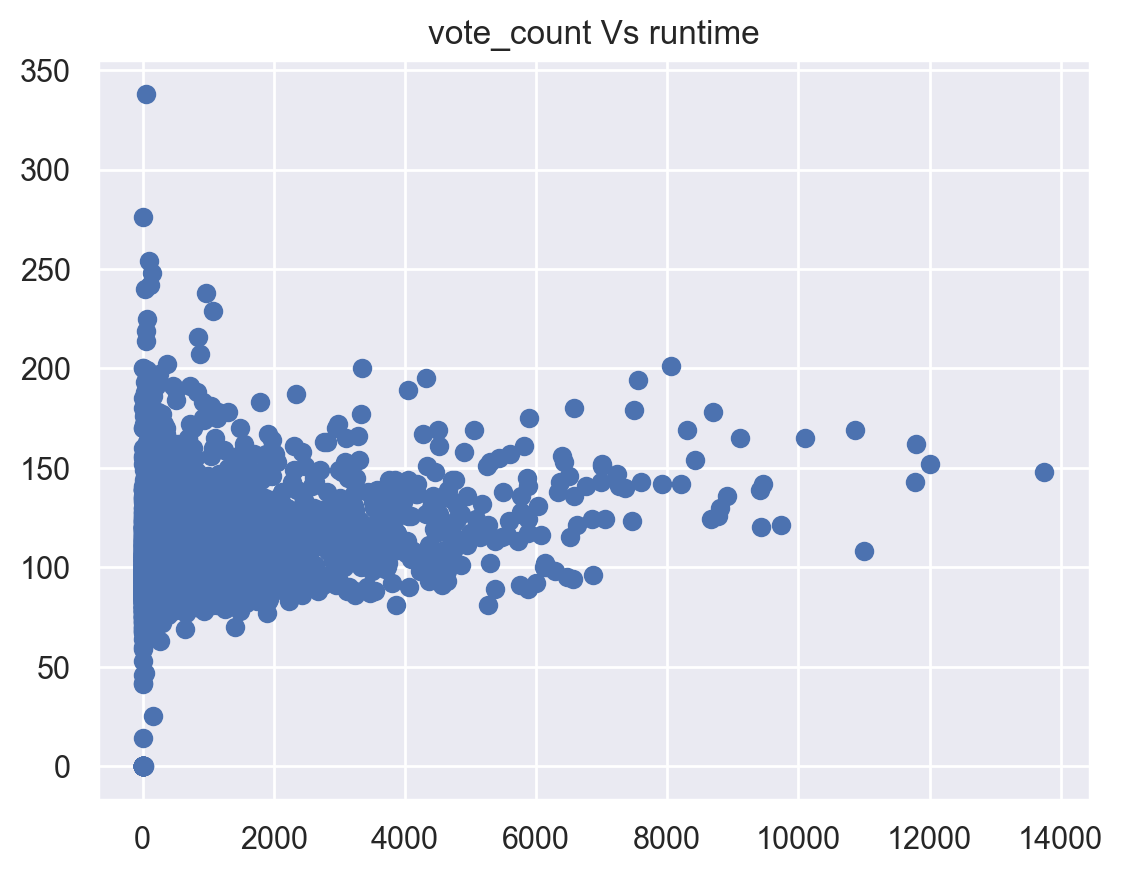

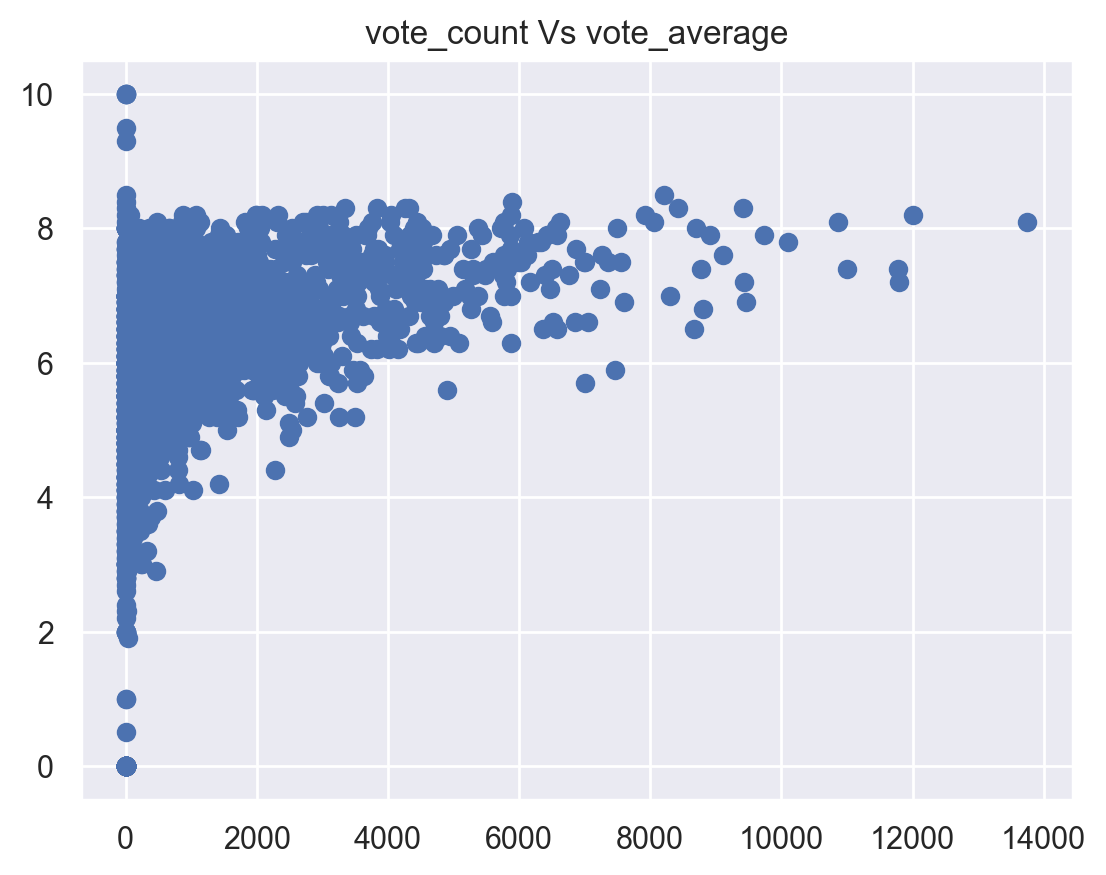

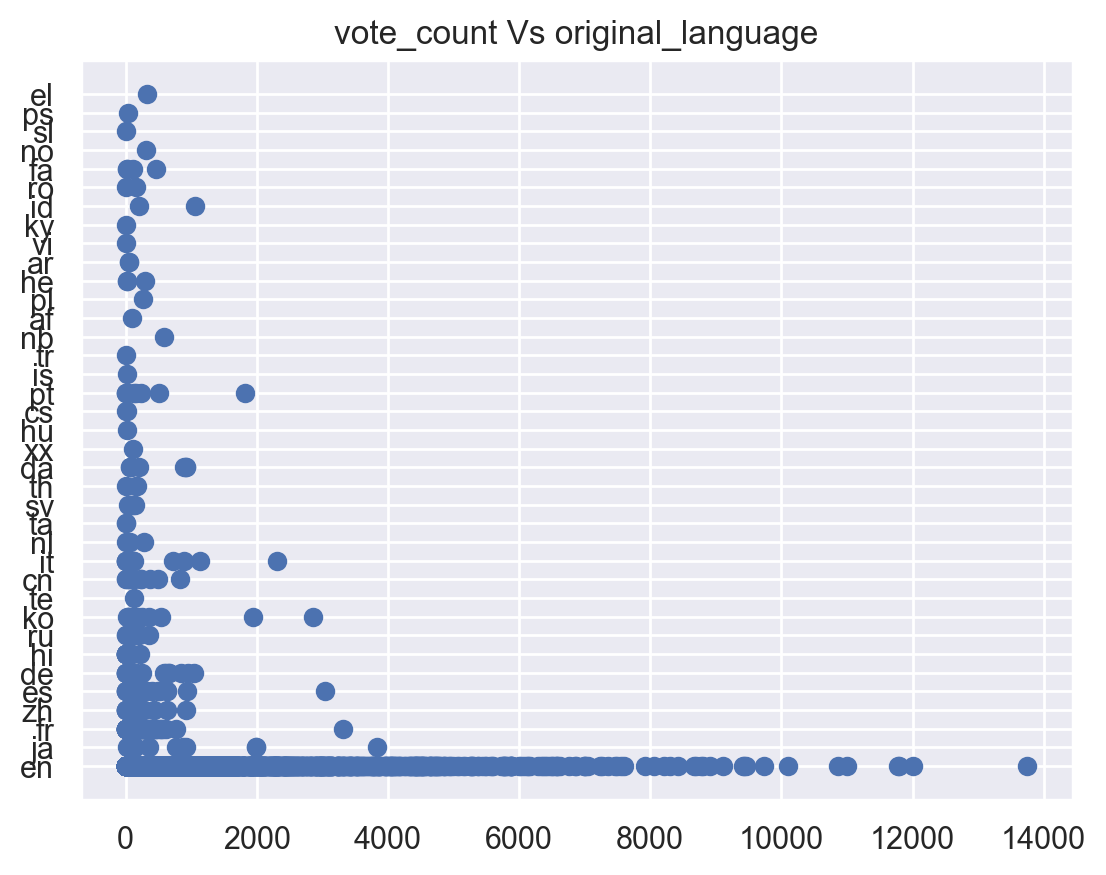

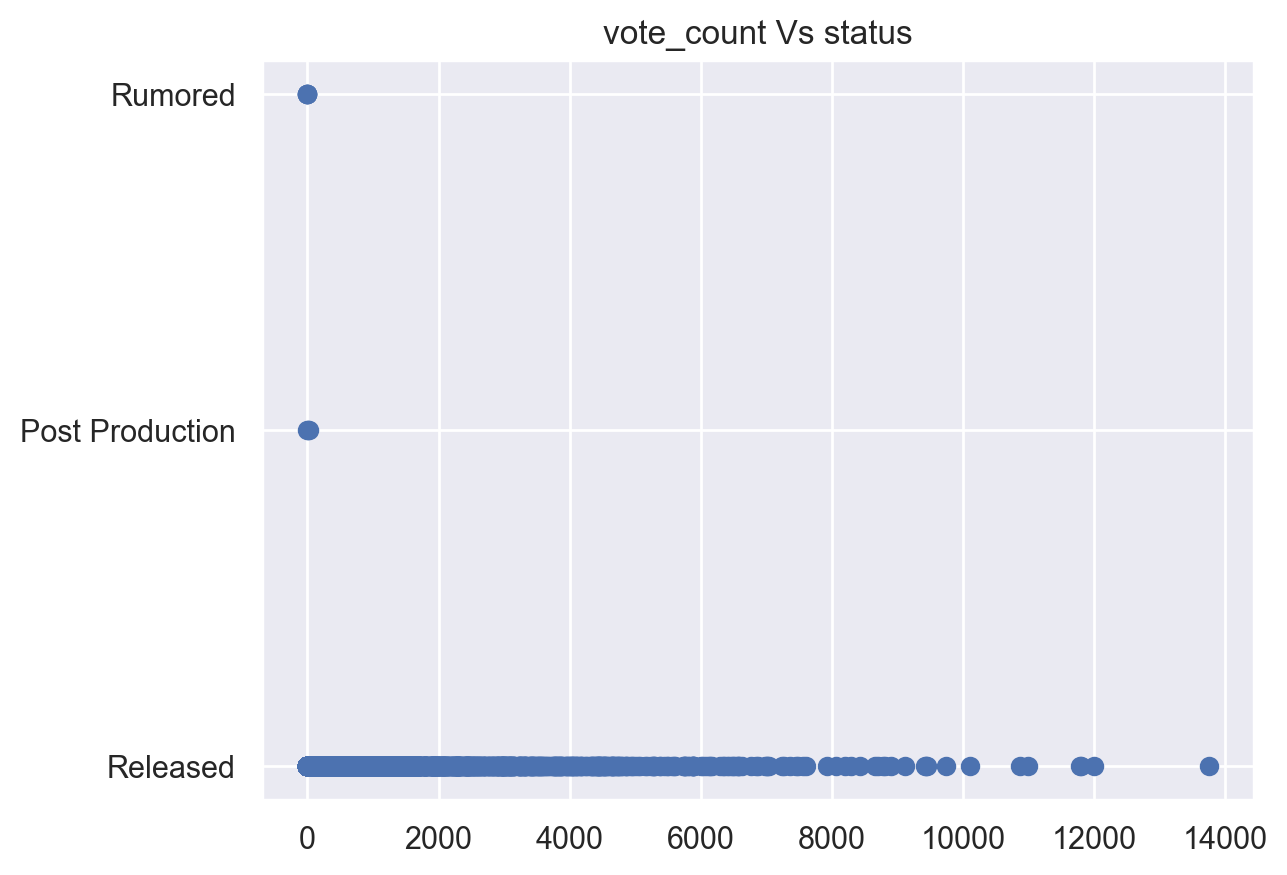

In [74]:
temp_check = set()
for i in numeric_col:
    for j in numeric_col+cat_col:
        if i != j and (i, j) not in temp_check:
            temp_check.add((i, j))
            plt.scatter(df[i], df[j])
            plt.title(i+' Vs '+j)
            plt.show()

**Scatter plot help us to see relation between features**
* We can see relation between budget and revenue
* w can see obvious relationships like popularity and vote count, revenue and vote count
* We can also observe that people don't like movies too short or too long and the cluster is formed in kind a between.

### Histogram and Density Curve

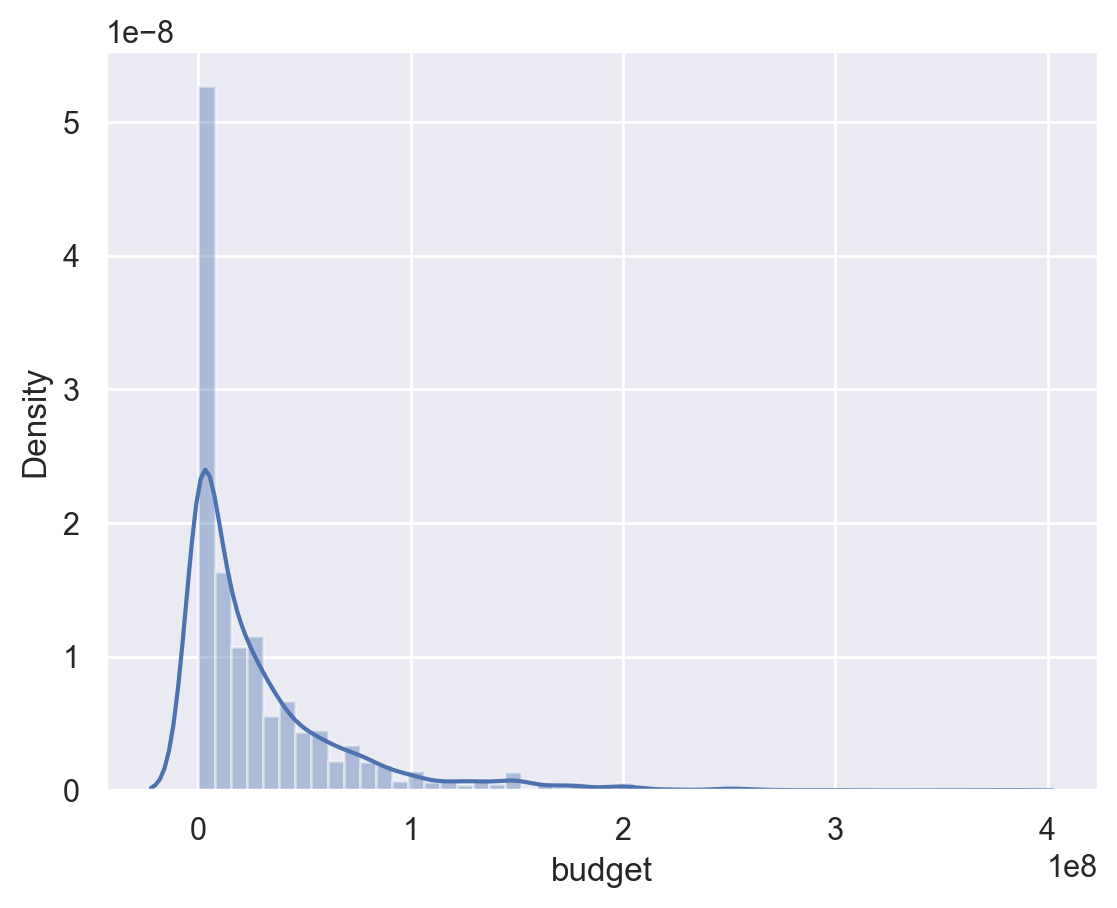

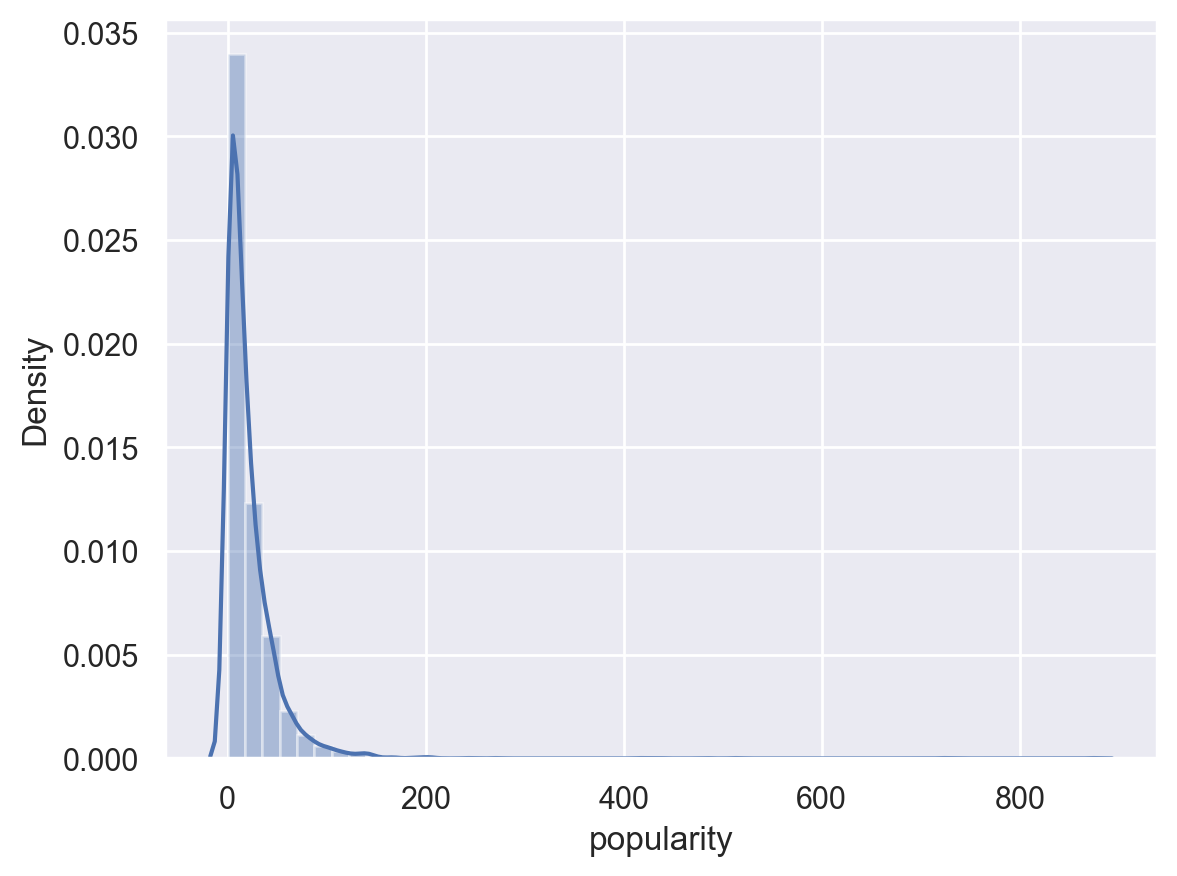

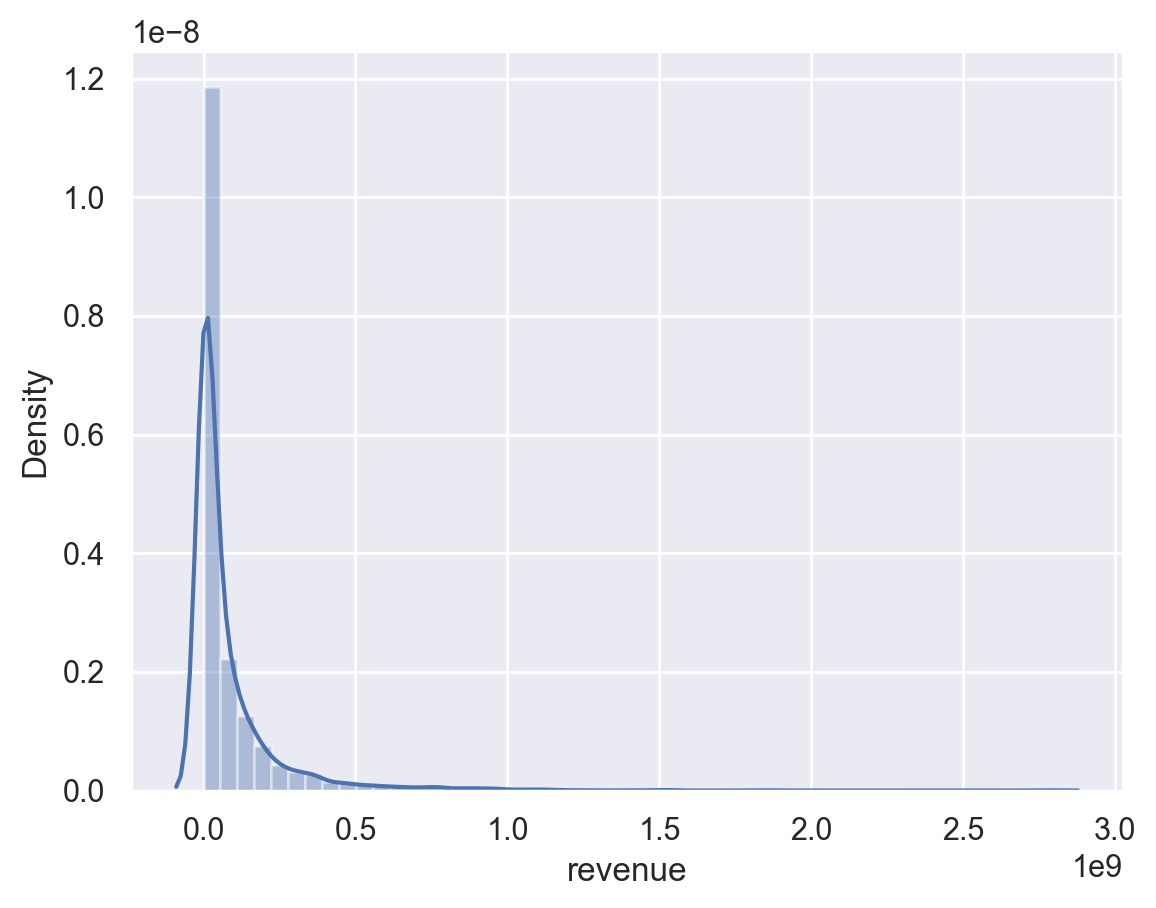

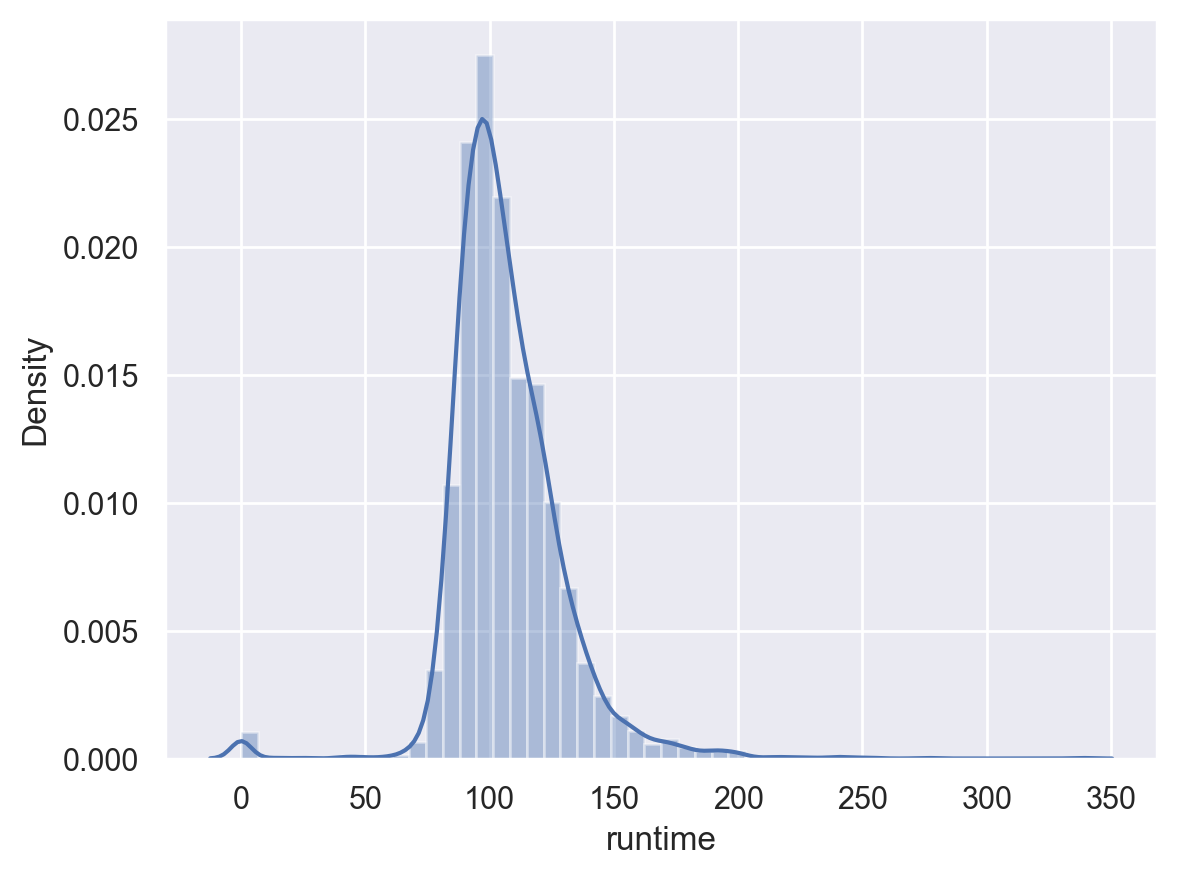

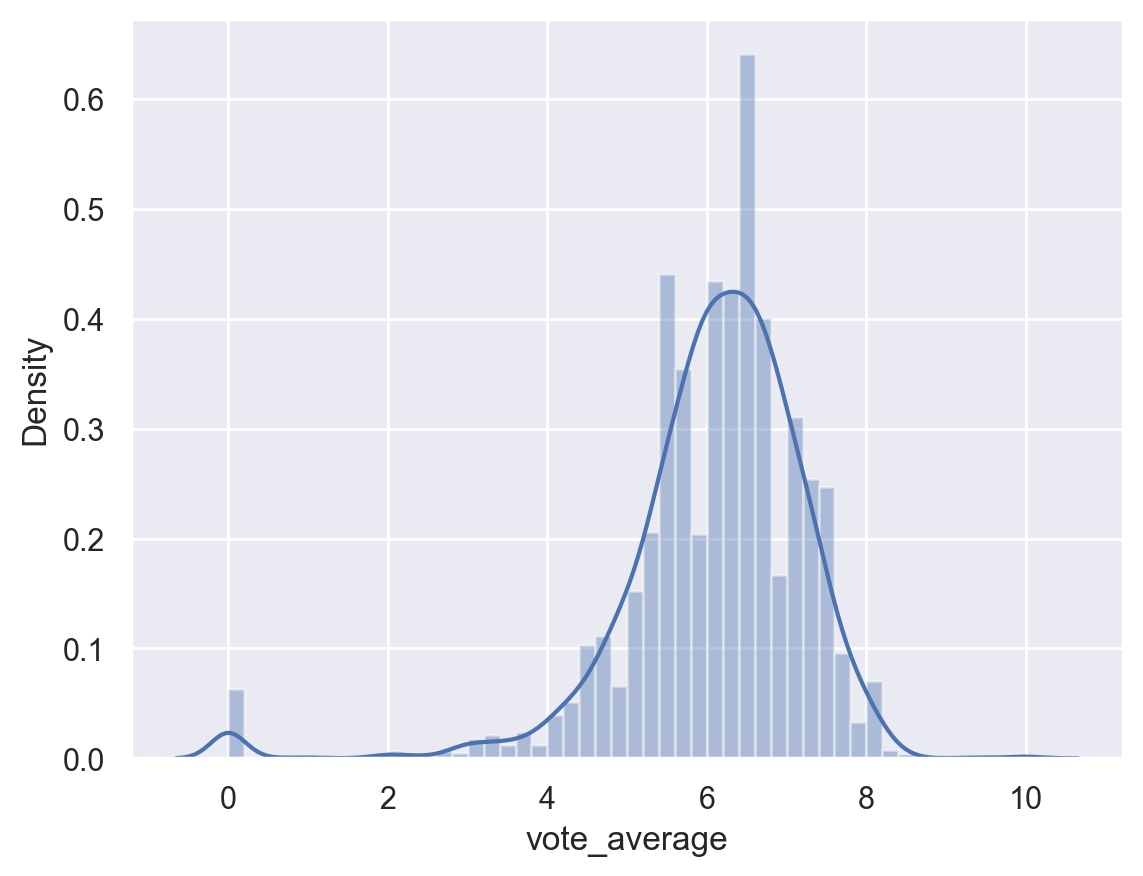

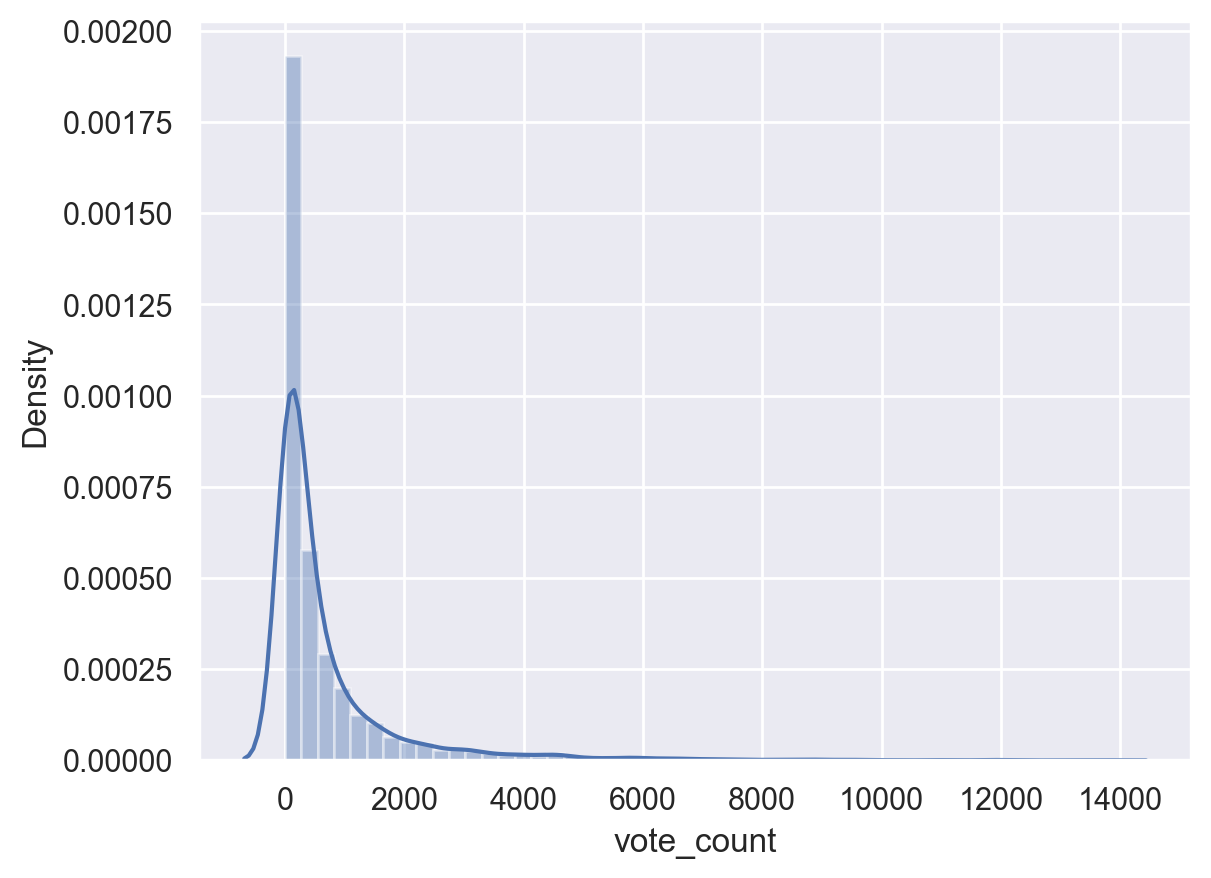

In [75]:
for col in numeric_col:
    sns.distplot(df[col])
    plt.show()

**This graph is like combination of histogram and density curve it is very helpful in finding distribution of values of feature**
* In our dataset budget, revenue, popularity, vote count and runtime are right skewed.
* Vote average is left skewed.

### Box and Wiskers Plots

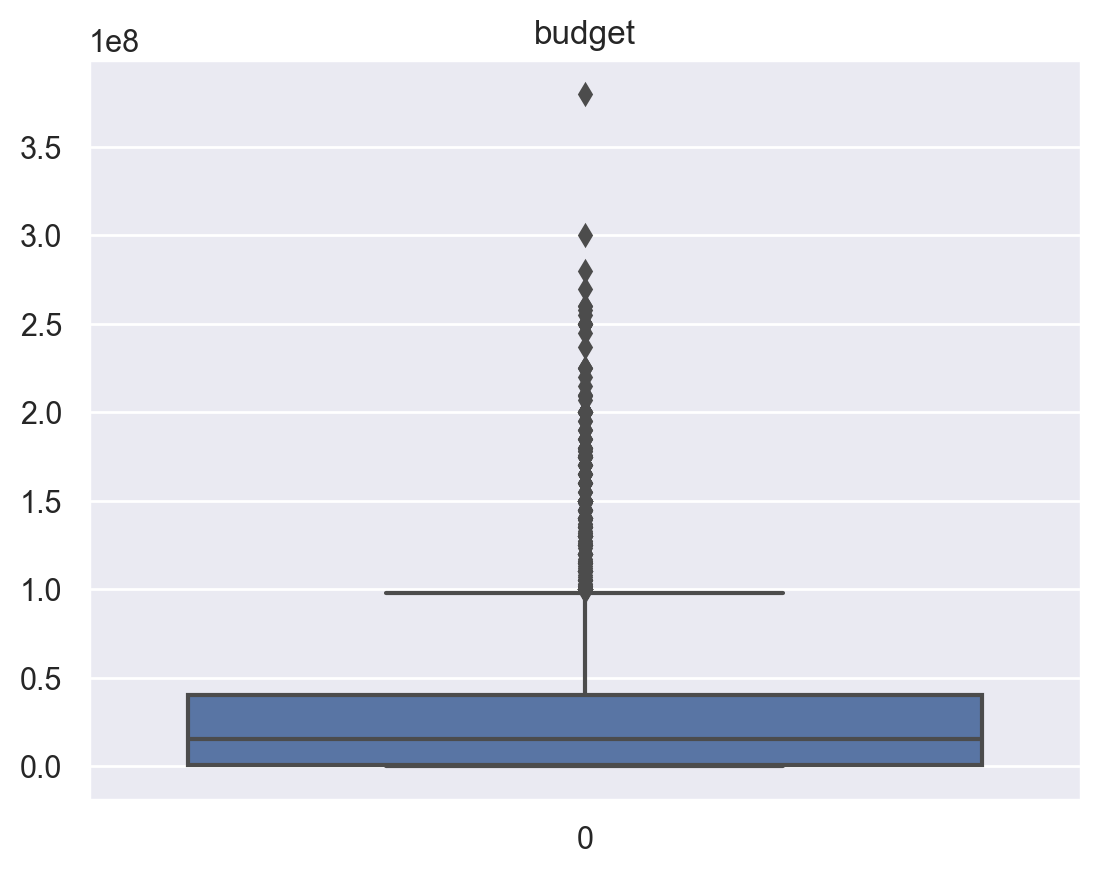

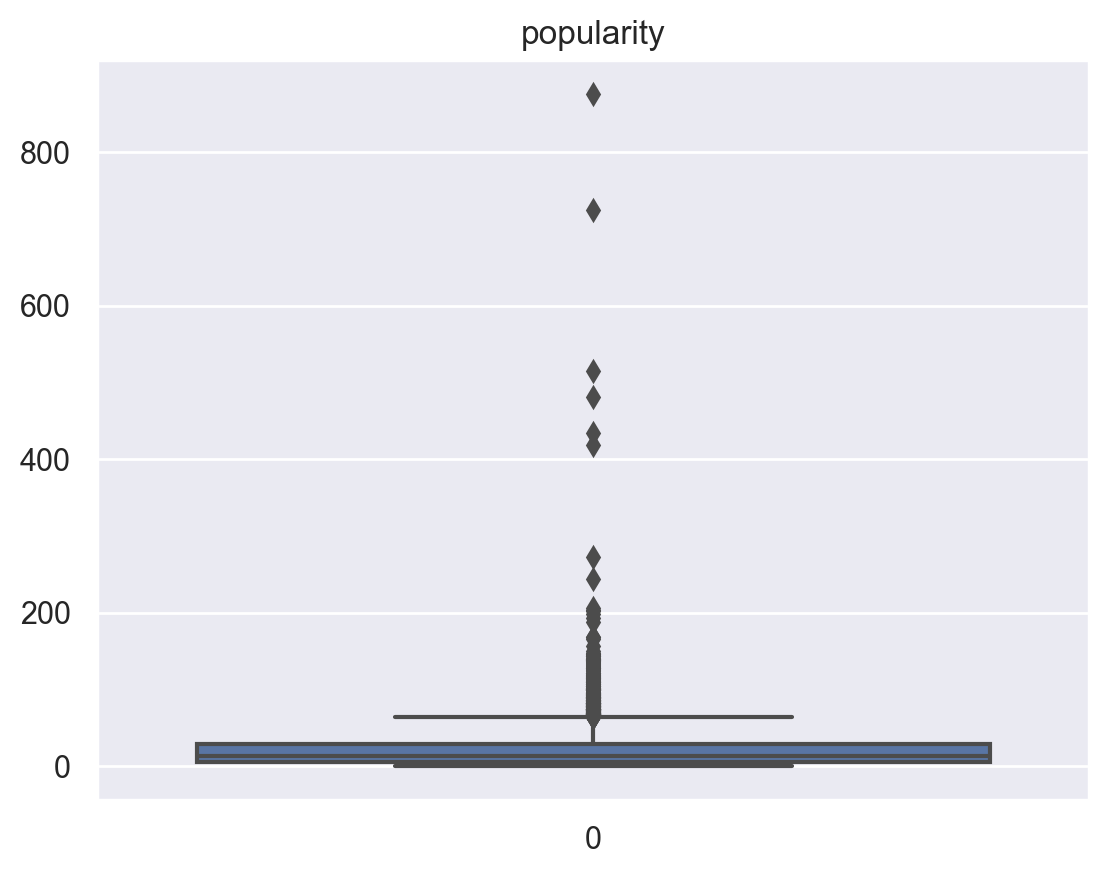

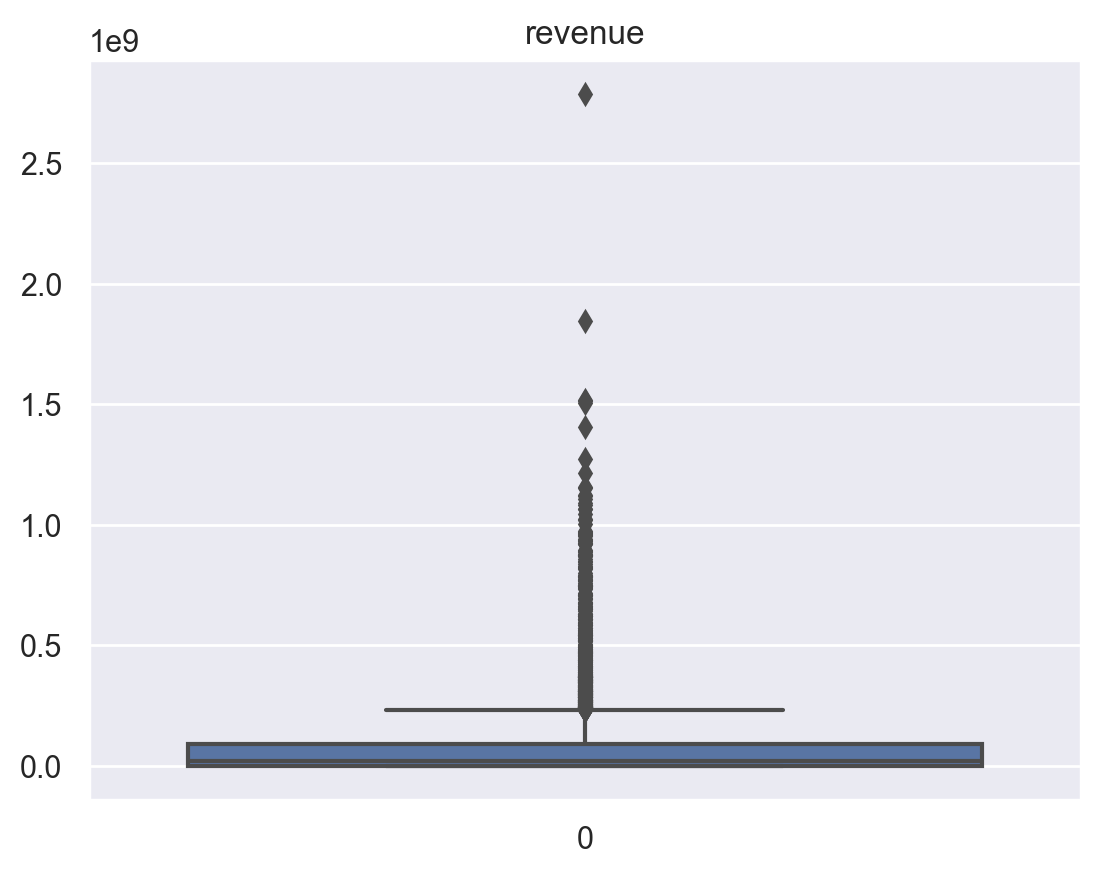

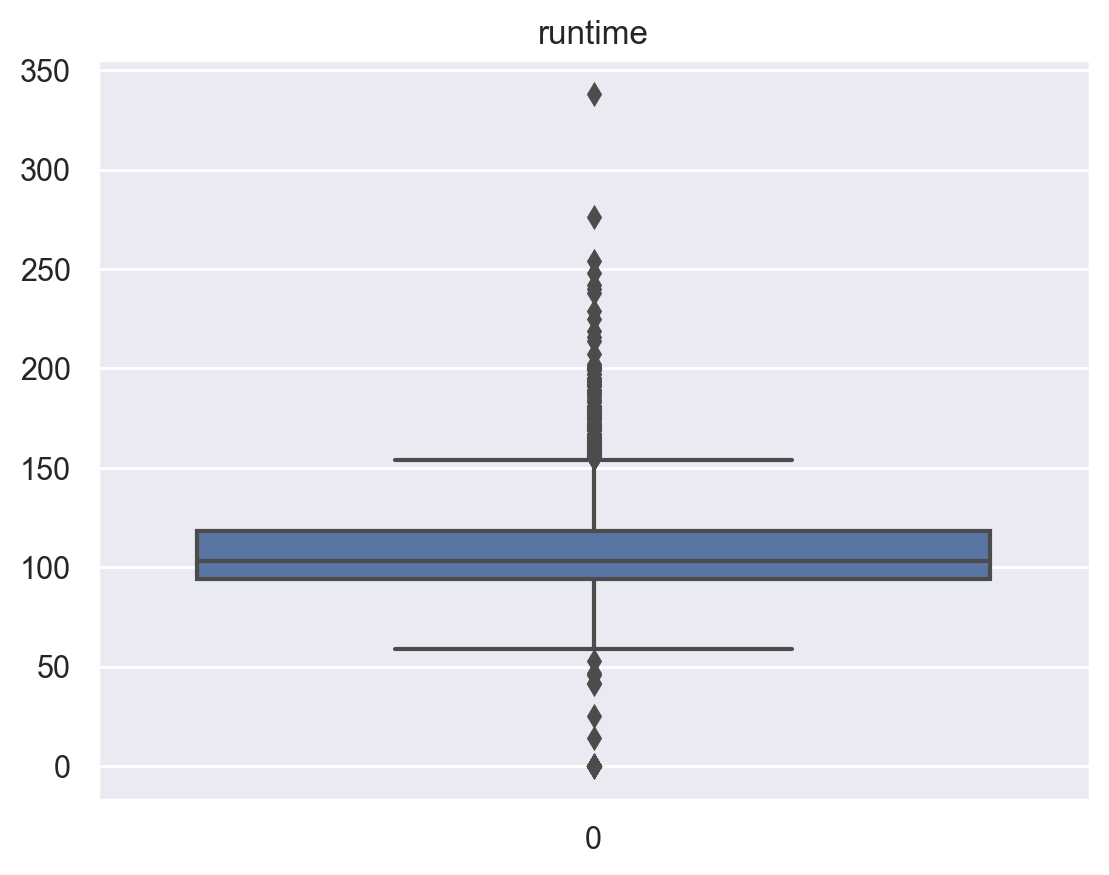

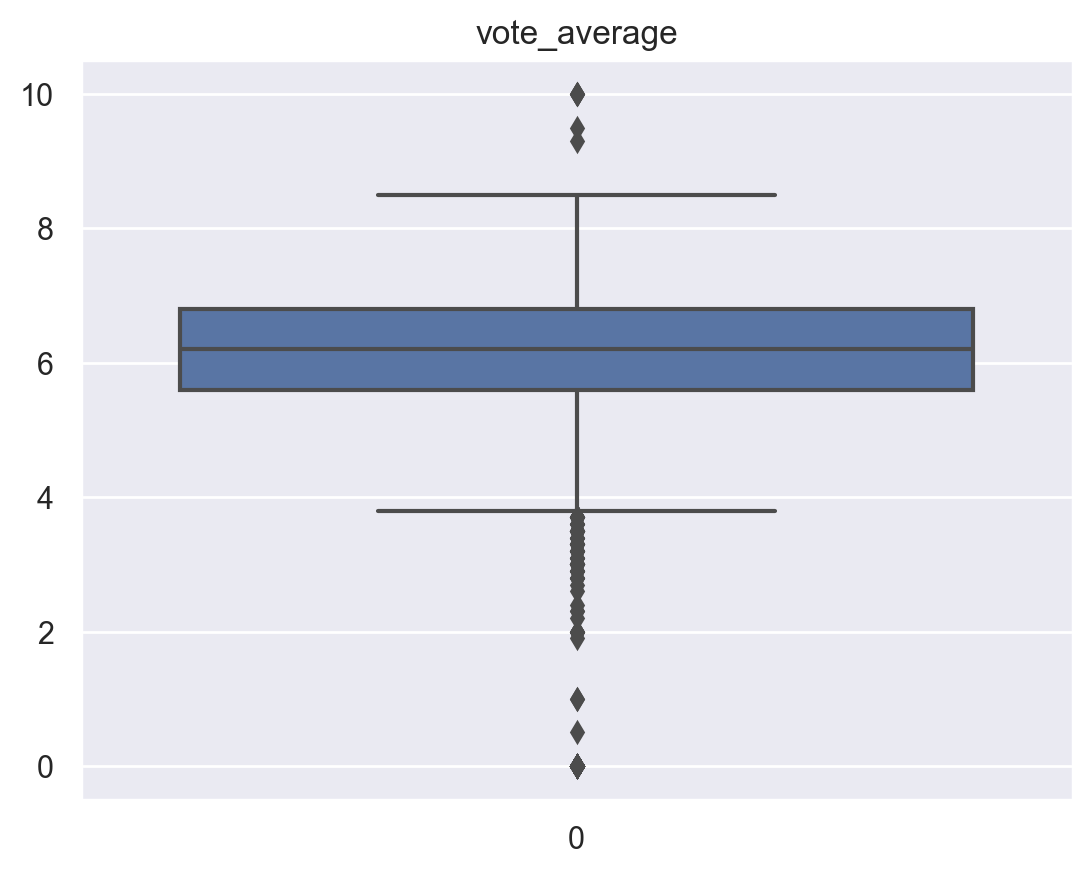

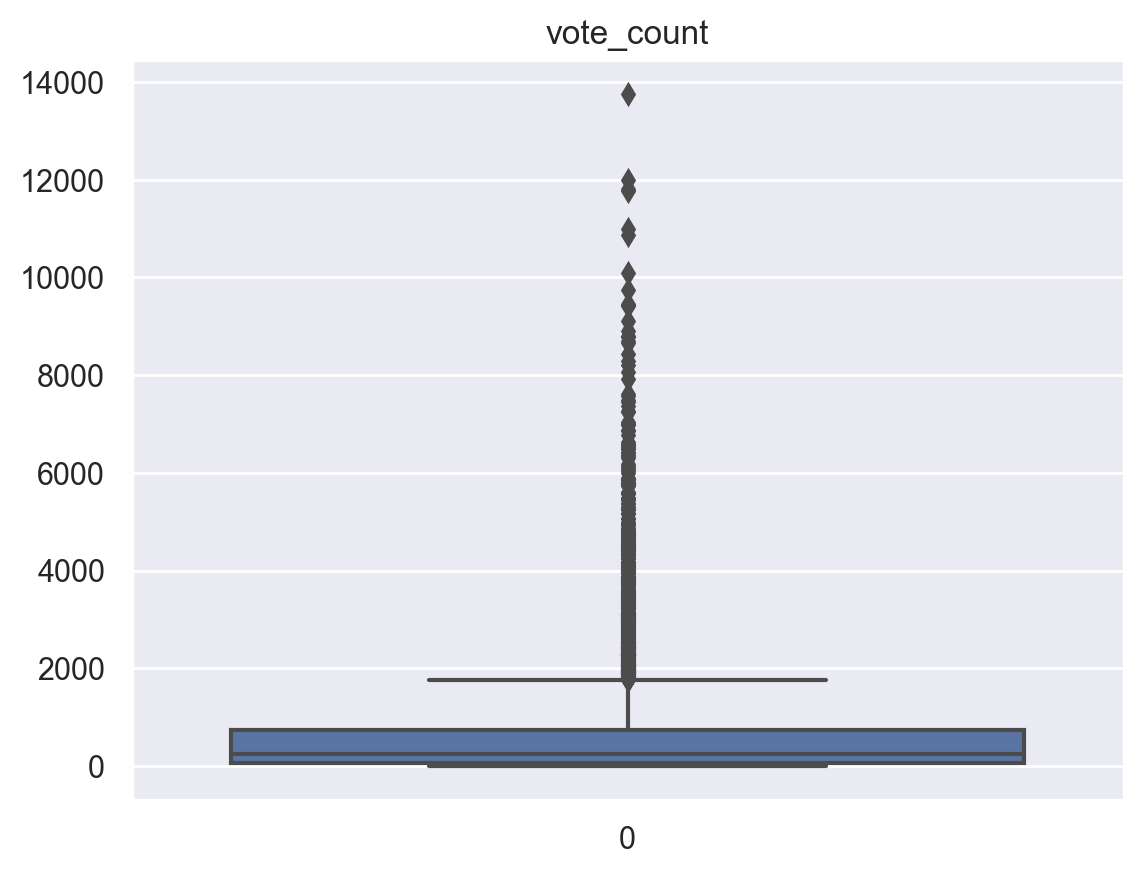

In [76]:
for col in numeric_col:
    sns.boxplot(data = df[col])
    plt.title(col)
    plt.show()

**Box Plot helps us in finding outliers in our dataset**
* This graph give us information about lower quartile, meddian, upper quartile, lower whisker and upper whisker
* The data befor and after, lower and upper wisker respectively are outliers.
* Usally outliers are removed from data to perform predictions and inter quartile range method is one of them.

## Handeling Ouliers

* There are many method for handling outliers.
* If the features values are normally distributed then we can use z-score (upper limit = 3 $\times$ z-score, lower limit = -3 $\times$ z-score). $\newline$
$$ z-score = \frac{X - {\bar X} }{ \sigma } \newline \space where \space X = value,
\newline {\bar X} = mean \space of \space values \space and \newline \sigma = Standard \space deviation$$
* In our case feature calues are not normally distrubuted so we can use interquartile range $\newline$
formula: Q $_1$ = First Qartile,  Q $_3$ = Third Qartile and Q $_2$ = median  $\newline$
Q $_1$ is median of values from starting to median and Q $_3$ is median of values from median to end value $\newline$
interquartile range(IQR) = Q $_3$ - Q $_1$ $\newline$
lower limit = Q $_1$ - 1.5 $\times$ IQR $\newline$
upper limit = Q $_3$ + 1.5 $\times$ IQR

In [146]:
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,science fiction,horror,tv movie,crime,...,mystery,comedy,fantasy,documentary,western,animation,drama,action,thriller,year
count,4.801000e+03,4801.000000,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,...,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.905714e+07,21.501243,8.229491e+07,106.899396,6.094709,690.505520,0.111435,0.108102,0.001666,0.144970,...,0.072485,0.358675,0.088315,0.022704,0.017080,0.048740,0.478442,0.240367,0.265361,2002.466153
std,4.072656e+07,31.820259,1.628824e+08,22.559414,1.188369,1234.762659,0.314703,0.310542,0.040791,0.352107,...,0.259316,0.479662,0.283782,0.148972,0.129582,0.215346,0.499587,0.427351,0.441571,12.414329
min,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1916.000000
25%,8.000000e+05,4.680206,0.000000e+00,94.000000,5.600000,54.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.000000
50%,1.500000e+07,12.928269,1.917997e+07,103.000000,6.200000,236.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000
75%,4.000000e+07,28.350529,9.292120e+07,118.000000,6.800000,737.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2011.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000


In [147]:
# Iterative method
data = df.copy()

def removeOutliers(data, col):
    Q3 = data[col].quantile(0.75)
    Q1 = data[col].quantile(0.25)
    IQR = Q3 - Q1

    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]


columnsToFilter = df.columns[[0, 2, 3, 4, 7, 8, 29]]
for i in columnsToFilter:
    if i == columnsToFilter[0]:
        removeOutliers(data, i)
    else:
        removeOutliers(filtered_data, i)


# Assigning filtered data back to our original variable
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)

IQR value for column budget is: 39200000.0
IQR value for column popularity is: 20.419650500000003
IQR value for column revenue is: 60089867.75
IQR value for column runtime is: 21.0
IQR value for column vote_average is: 1.2000000000000002
IQR value for column vote_count is: 365.0
IQR value for column year is: 11.0
Shape of data after outlier removal is:  (3093, 30)


In [148]:
filtered_data

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,science fiction,...,mystery,comedy,fantasy,documentary,western,animation,drama,action,thriller,year
83,27000000,en,2.418535,0,109.0,Released,The Lovers,4.8,34,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015
97,15000000,ja,9.476999,77000000,120.0,Released,Shin Godzilla,6.5,143,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2016
235,97250400,fr,20.344364,132900000,116.0,Released,Asterix at the Olympic Games,5.0,471,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
265,0,en,18.251129,0,82.0,Released,The Cat in the Hat,4.9,366,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2003
272,90000000,en,1.004579,10372291,104.0,Released,Town & Country,3.7,16,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,es,14.269792,2040920,81.0,Released,El Mariachi,6.6,238,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1992
4799,9000,en,0.642552,0,85.0,Released,Newlyweds,5.9,5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011
4800,0,en,1.444476,0,120.0,Released,"Signed, Sealed, Delivered",7.0,6,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2013
4801,0,en,0.857008,0,98.0,Released,Shanghai Calling,5.7,7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012


In [149]:
# Recursive Method

def remove_outliers(data, columns):
    if len(columns) == 0:
        return data
    Q1 = data[columns[0]].quantile(0.25)
    Q3 = data[columns[0]].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    data = data[(data[columns[0]] > lower_limit) & (data[columns[0]] < upper_limit)]
    data = remove_outliers(data, columns[1:])
    return data

In [150]:
cloumnsToFilter = df.columns[[0, 2, 3, 4, 7, 8, 29]]
filteredData = remove_outliers(df.copy(), cloumnsToFilter)
filteredData

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,science fiction,...,mystery,comedy,fantasy,documentary,western,animation,drama,action,thriller,year
83,27000000,en,2.418535,0,109.0,Released,The Lovers,4.8,34,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015
97,15000000,ja,9.476999,77000000,120.0,Released,Shin Godzilla,6.5,143,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2016
235,97250400,fr,20.344364,132900000,116.0,Released,Asterix at the Olympic Games,5.0,471,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
265,0,en,18.251129,0,82.0,Released,The Cat in the Hat,4.9,366,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2003
272,90000000,en,1.004579,10372291,104.0,Released,Town & Country,3.7,16,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,es,14.269792,2040920,81.0,Released,El Mariachi,6.6,238,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1992
4799,9000,en,0.642552,0,85.0,Released,Newlyweds,5.9,5,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011
4800,0,en,1.444476,0,120.0,Released,"Signed, Sealed, Delivered",7.0,6,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2013
4801,0,en,0.857008,0,98.0,Released,Shanghai Calling,5.7,7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2012


## Saving Cleaned Data

* We have cleaned our data.
* To use cleaned data in future we have to save the data.
* May be we can build model based on this data like to predict which genre of movies get more revenue.
* or to predict what is optimum budget for a certain genre of movies and many more ideas.
* So let's save the cleaned data

In [152]:
# First the path to save file and index = false for not saving index in csv file it's useful
filteredData.to_csv(r'tmdb-movie-metadata/tmdb_5000_movies_cleaned_data.csv', index=False)